In [1]:
import os, shutil, random, glob

BASE = "data"   # your unzipped folder

IMG_DIR = f"{BASE}/images"
LAB_DIR = f"{BASE}/labels"

# Create split folders
for sub in ["train", "val", "test"]:
    os.makedirs(f"{IMG_DIR}/{sub}", exist_ok=True)
    os.makedirs(f"{LAB_DIR}/{sub}", exist_ok=True)

# Load images
images = sorted(glob.glob(f"{IMG_DIR}/*.jpg"))
random.shuffle(images)

n = len(images)
train = images[:int(0.7*n)]
val   = images[int(0.7*n):int(0.9*n)]
test  = images[int(0.9*n):]

# Move helper
def move_files(file_list, split):
    for img in file_list:
        name = os.path.basename(img)
        lab = f"{LAB_DIR}/{name.replace('.jpg','.txt')}"
        
        shutil.move(img, f"{IMG_DIR}/{split}/{name}")
        shutil.move(lab, f"{LAB_DIR}/{split}/{name.replace('.jpg','.txt')}")


move_files(train, "train")
move_files(val, "val")
move_files(test, "test")

print("Dataset split done!")


Dataset split done!


In [2]:
%%writefile milk.yaml
train: data/images/train
val: data/images/val
test: data/images/test

nc: 3
names: ['Milk_Low','Milk_High','Milk_Overflow']


Writing milk.yaml


In [3]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data="milk.yaml",
    epochs=40,
    imgsz=640,
    batch=8,    # If GPU memory low, use 4
    device=0    # Use your RTX 3050 GPU
)


Ultralytics 8.3.234  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=milk.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000025A94D57AF0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [4]:
import glob

RUN_PATH = sorted(glob.glob("runs/detect/*"))[-1]   # gets latest training folder
print("Your training folder:", RUN_PATH)


Your training folder: runs/detect\train


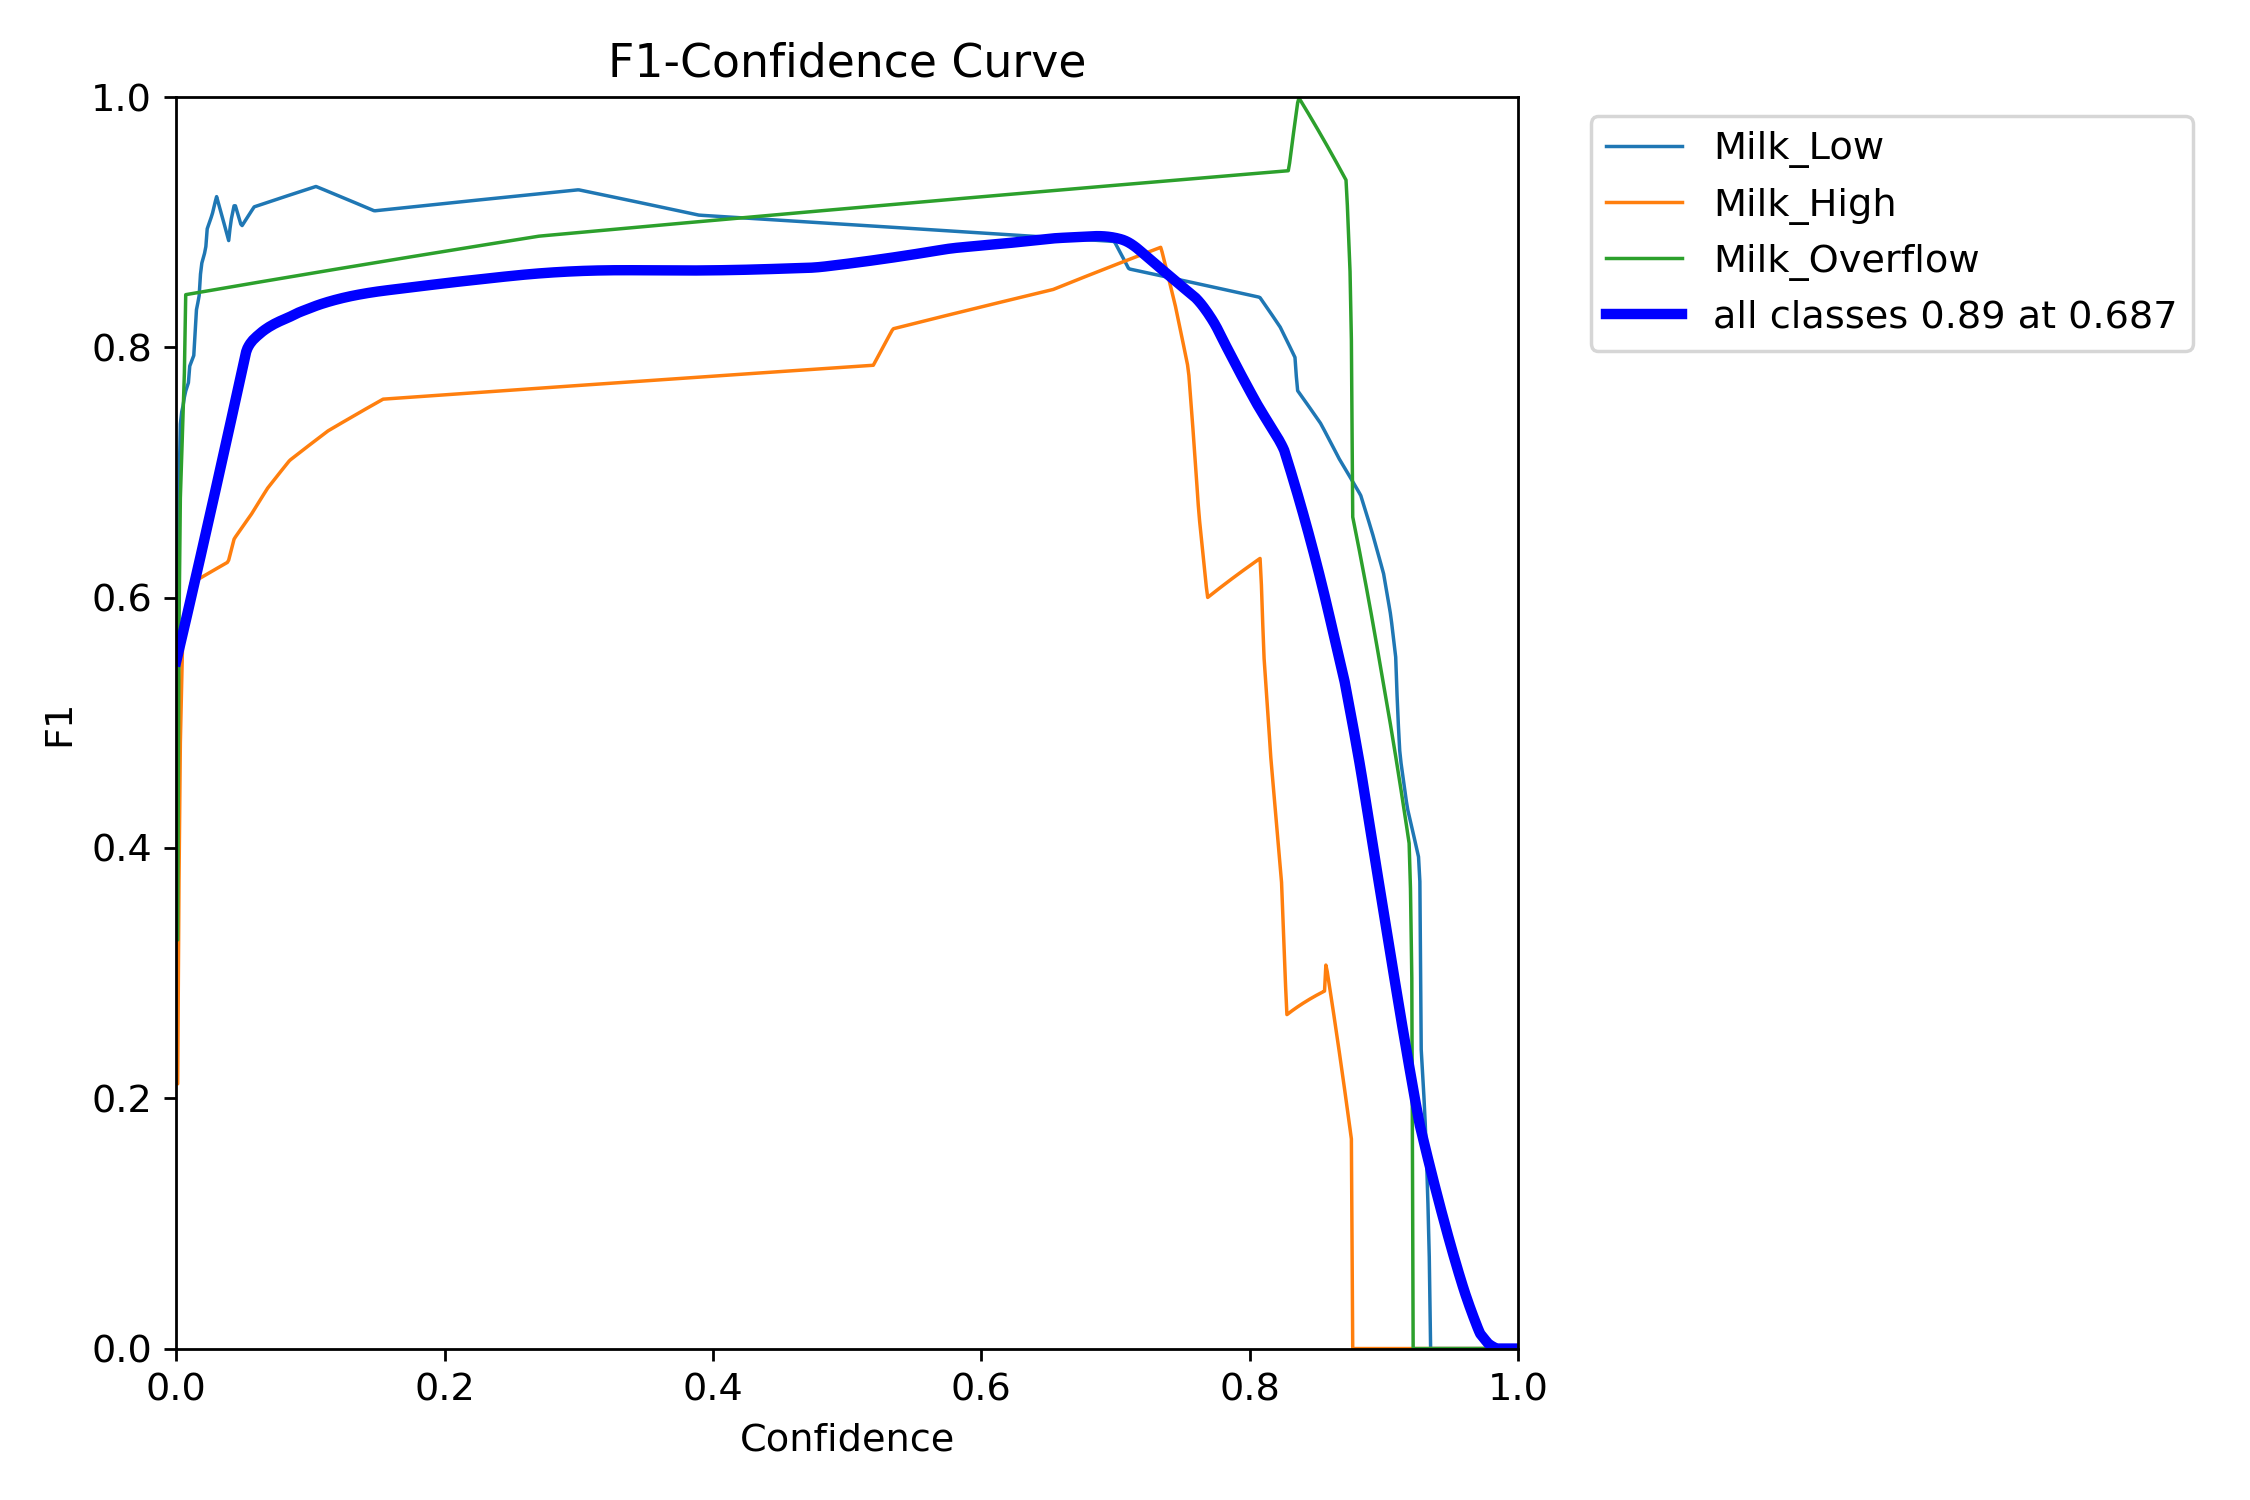

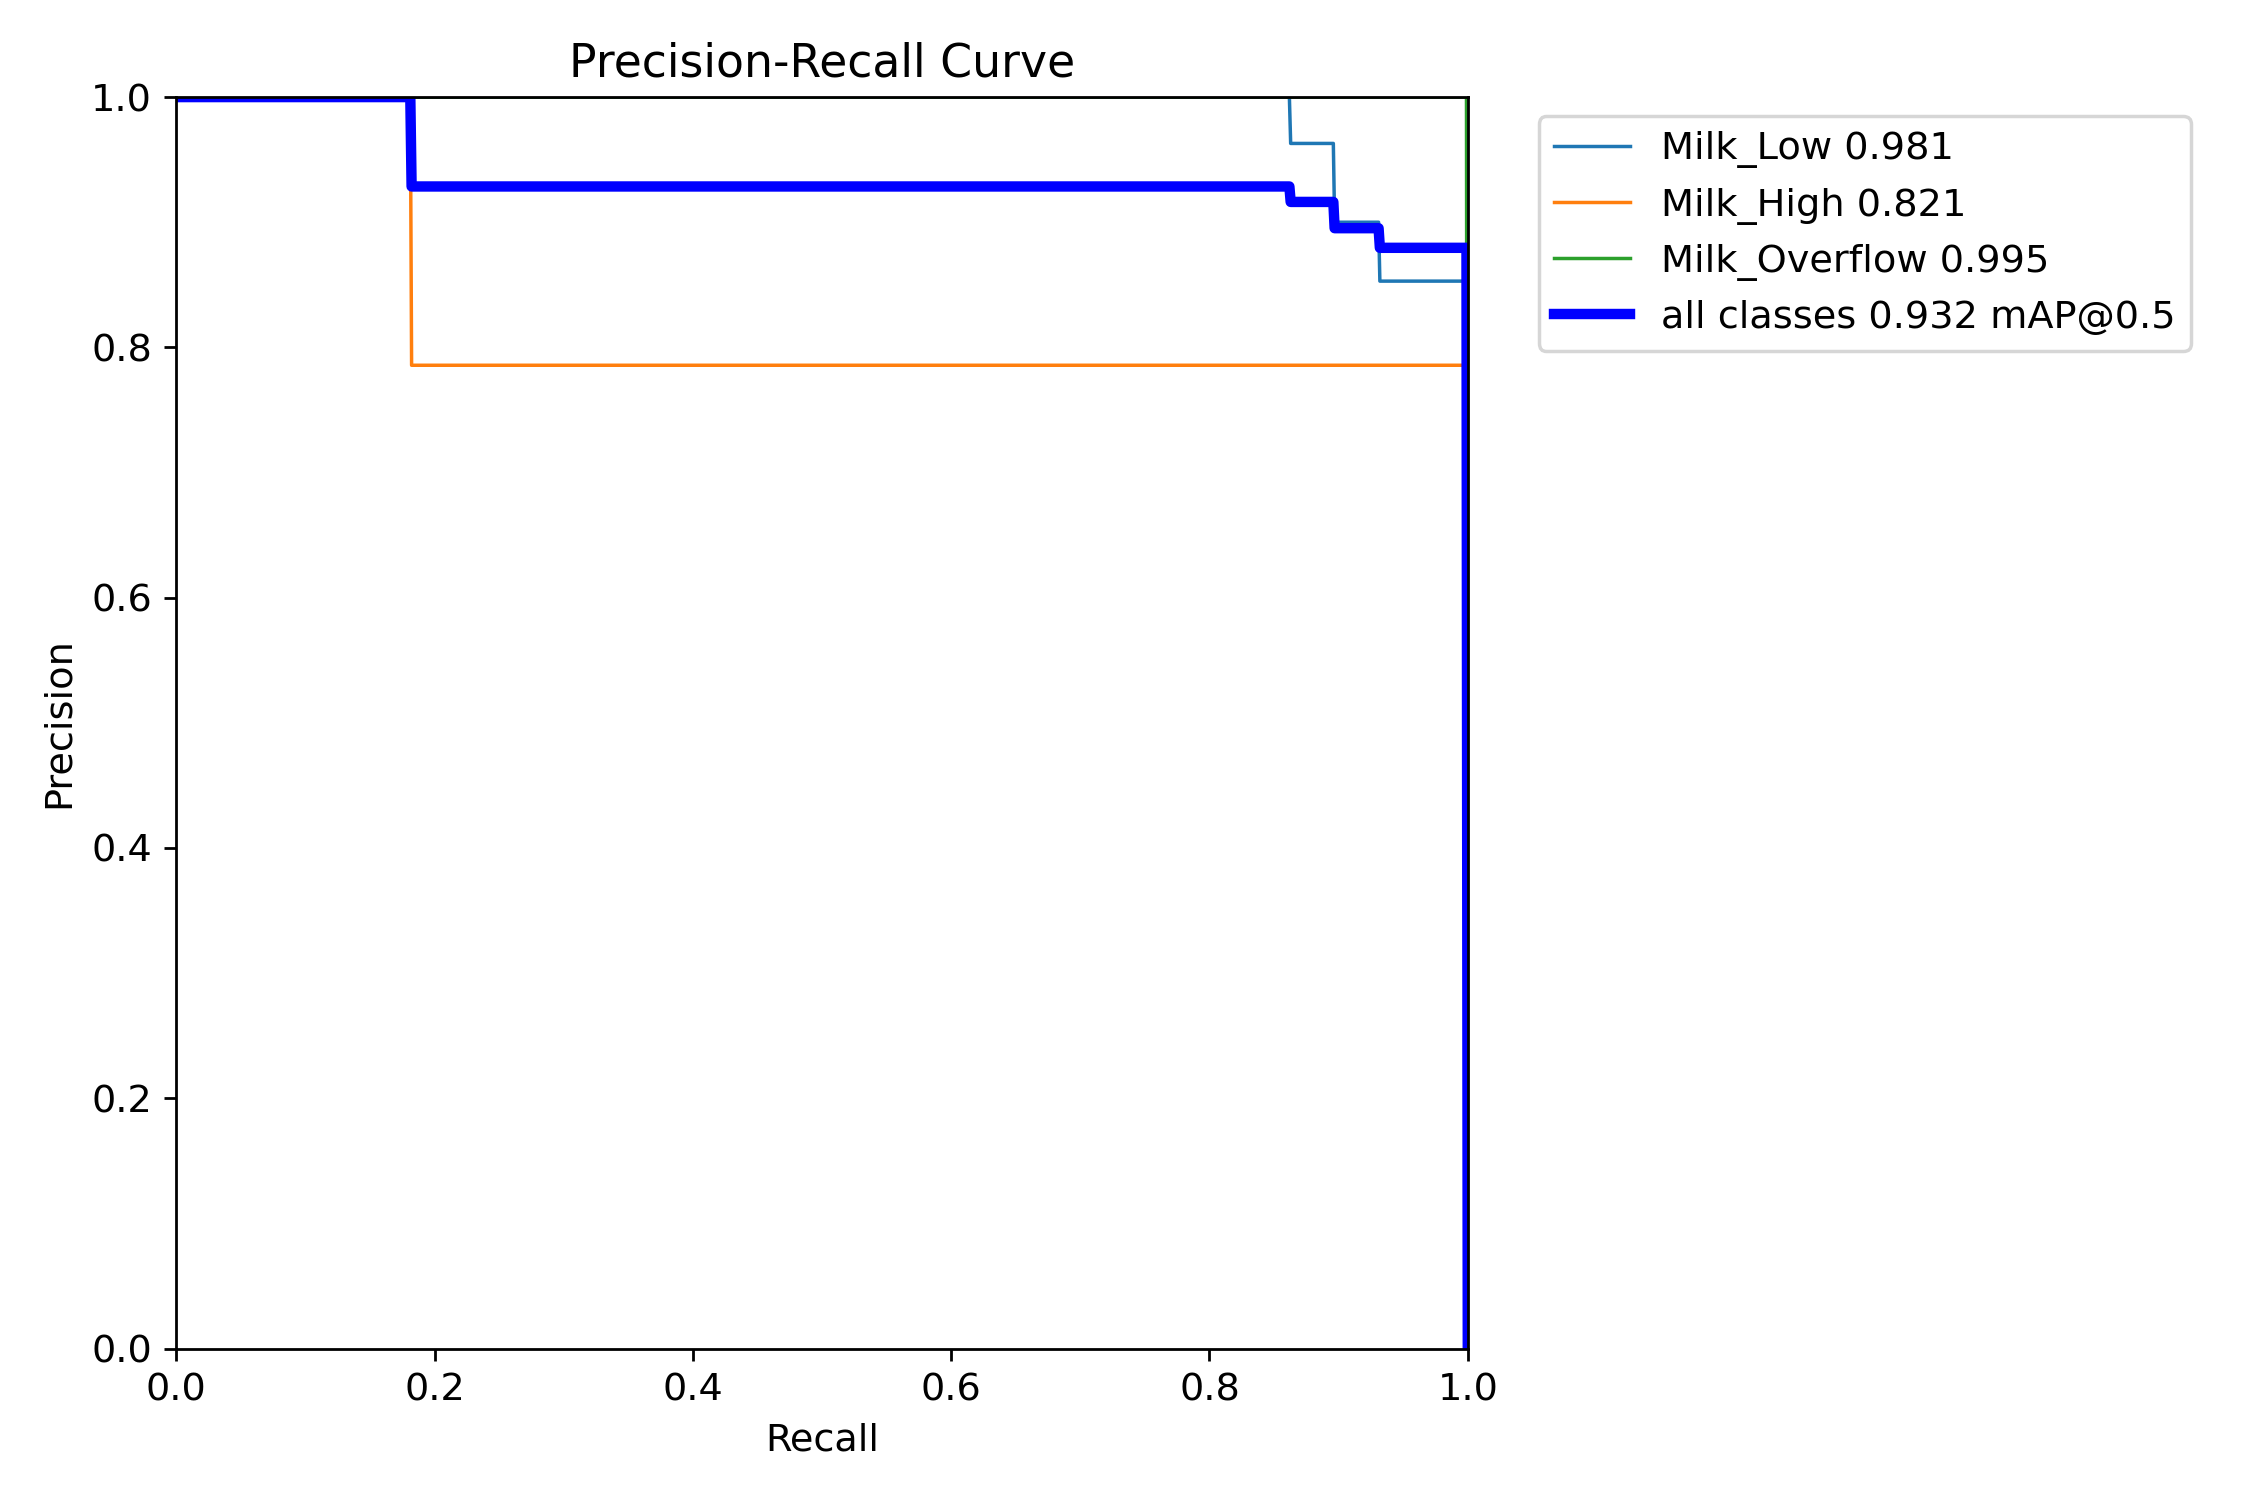

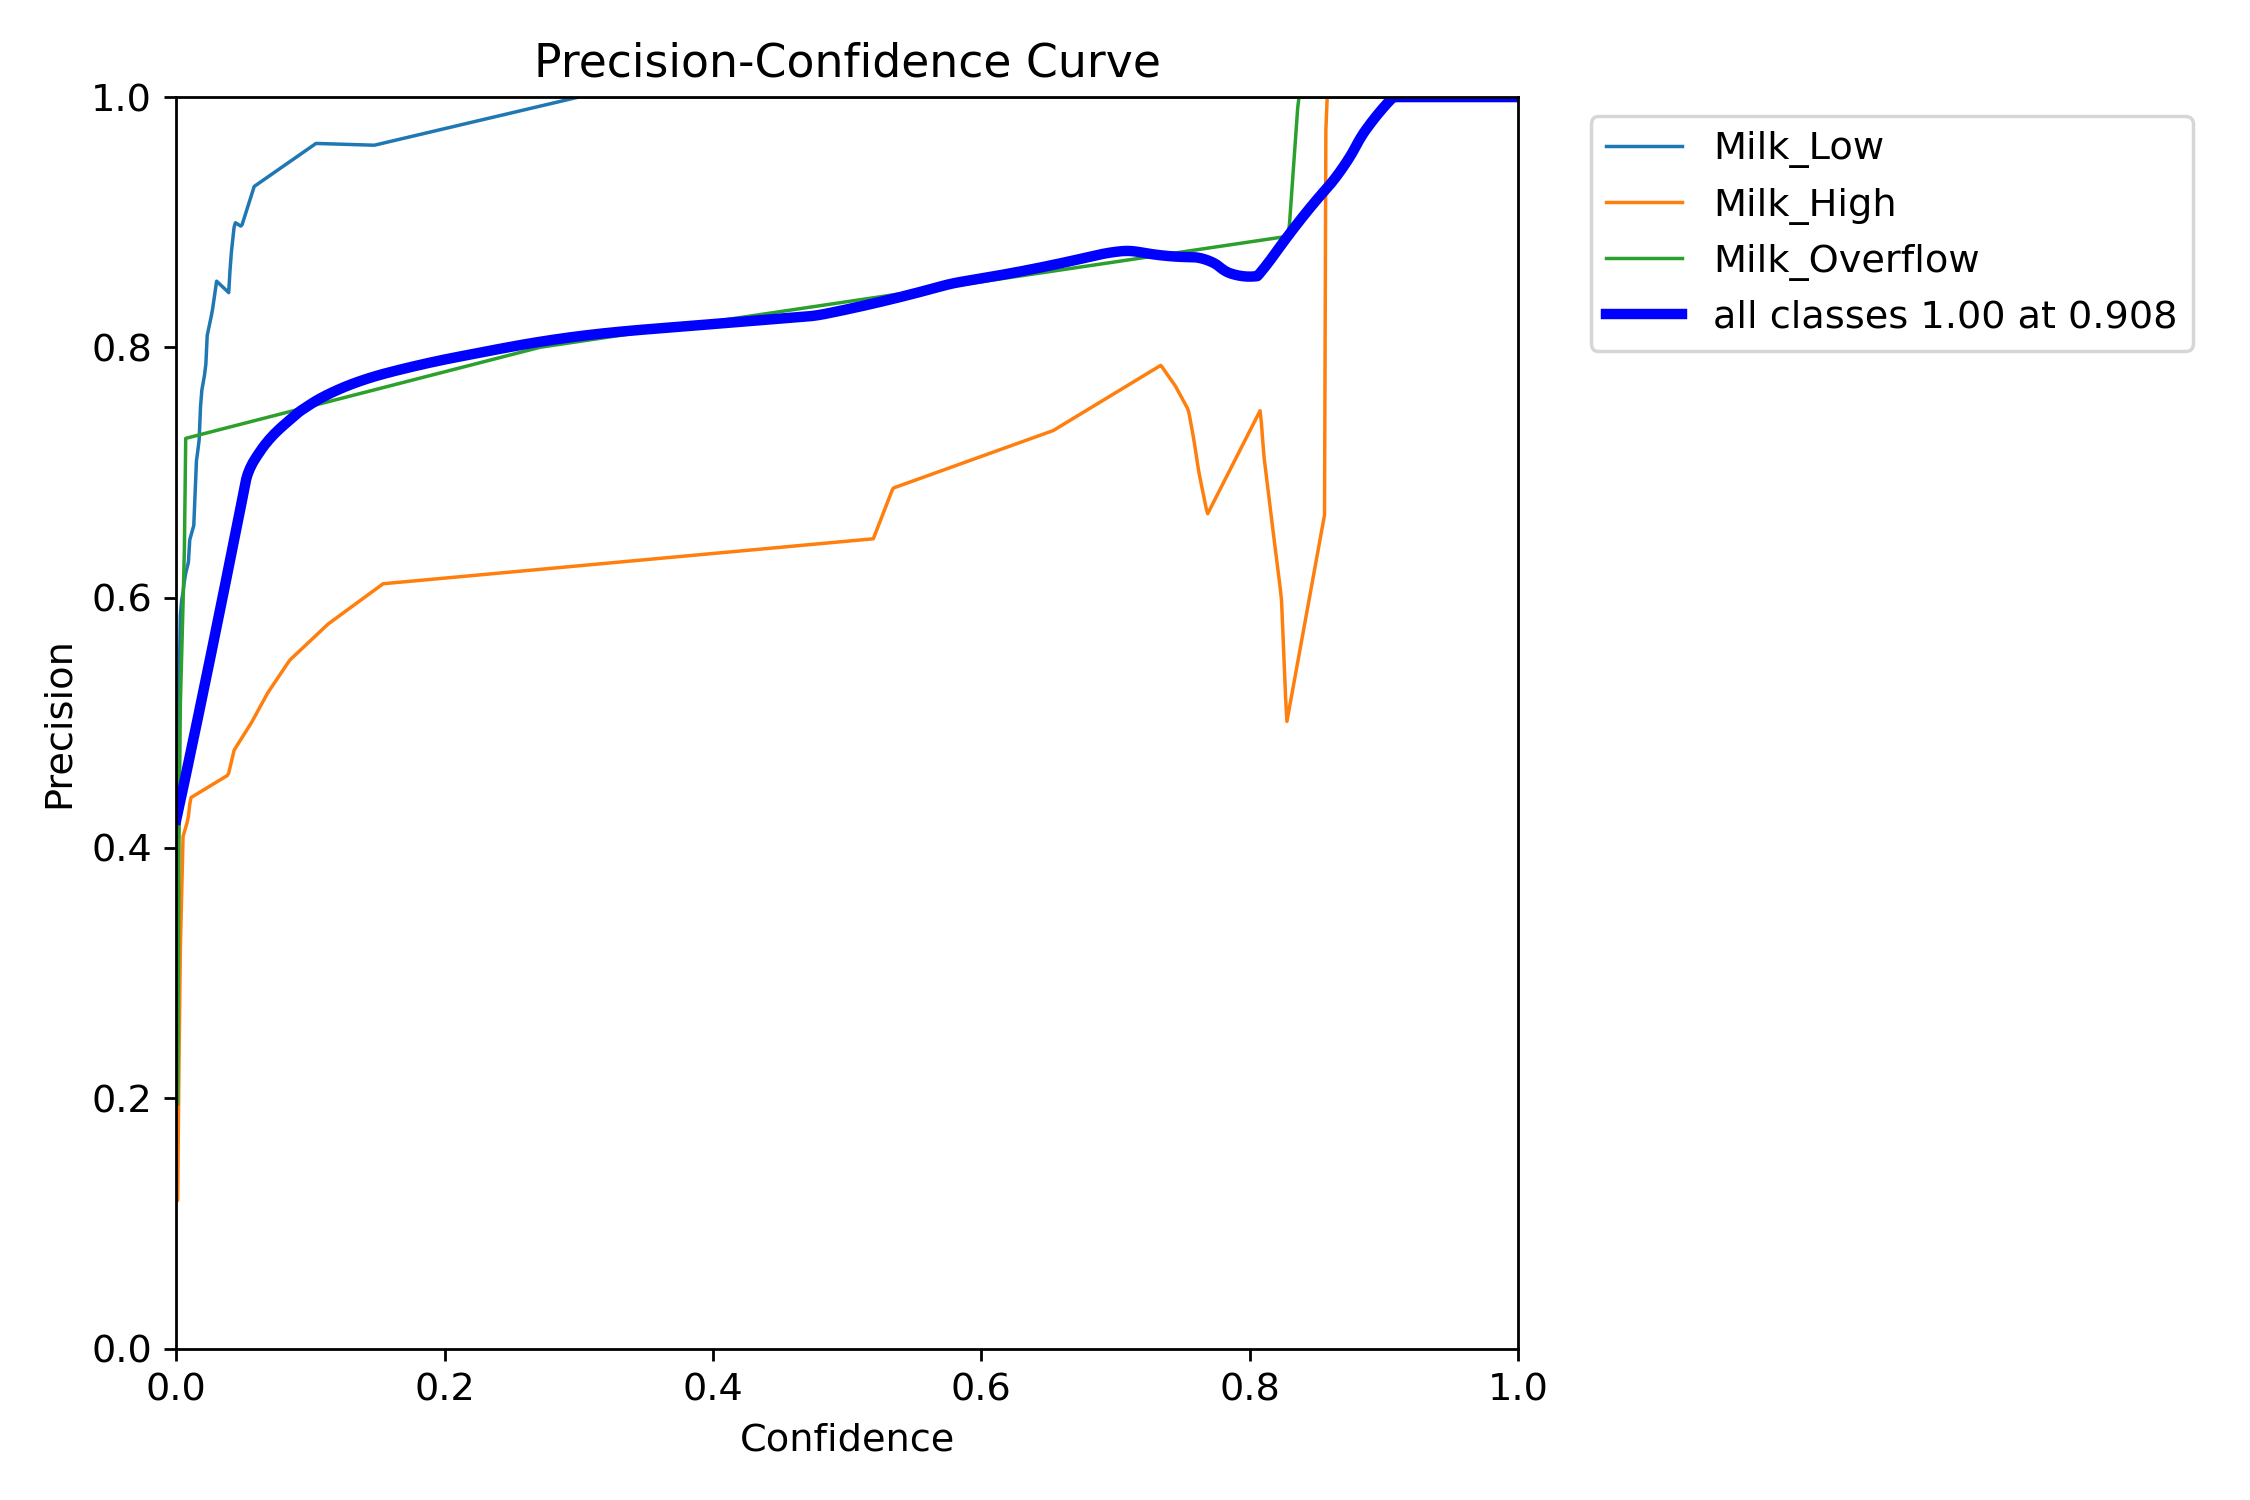

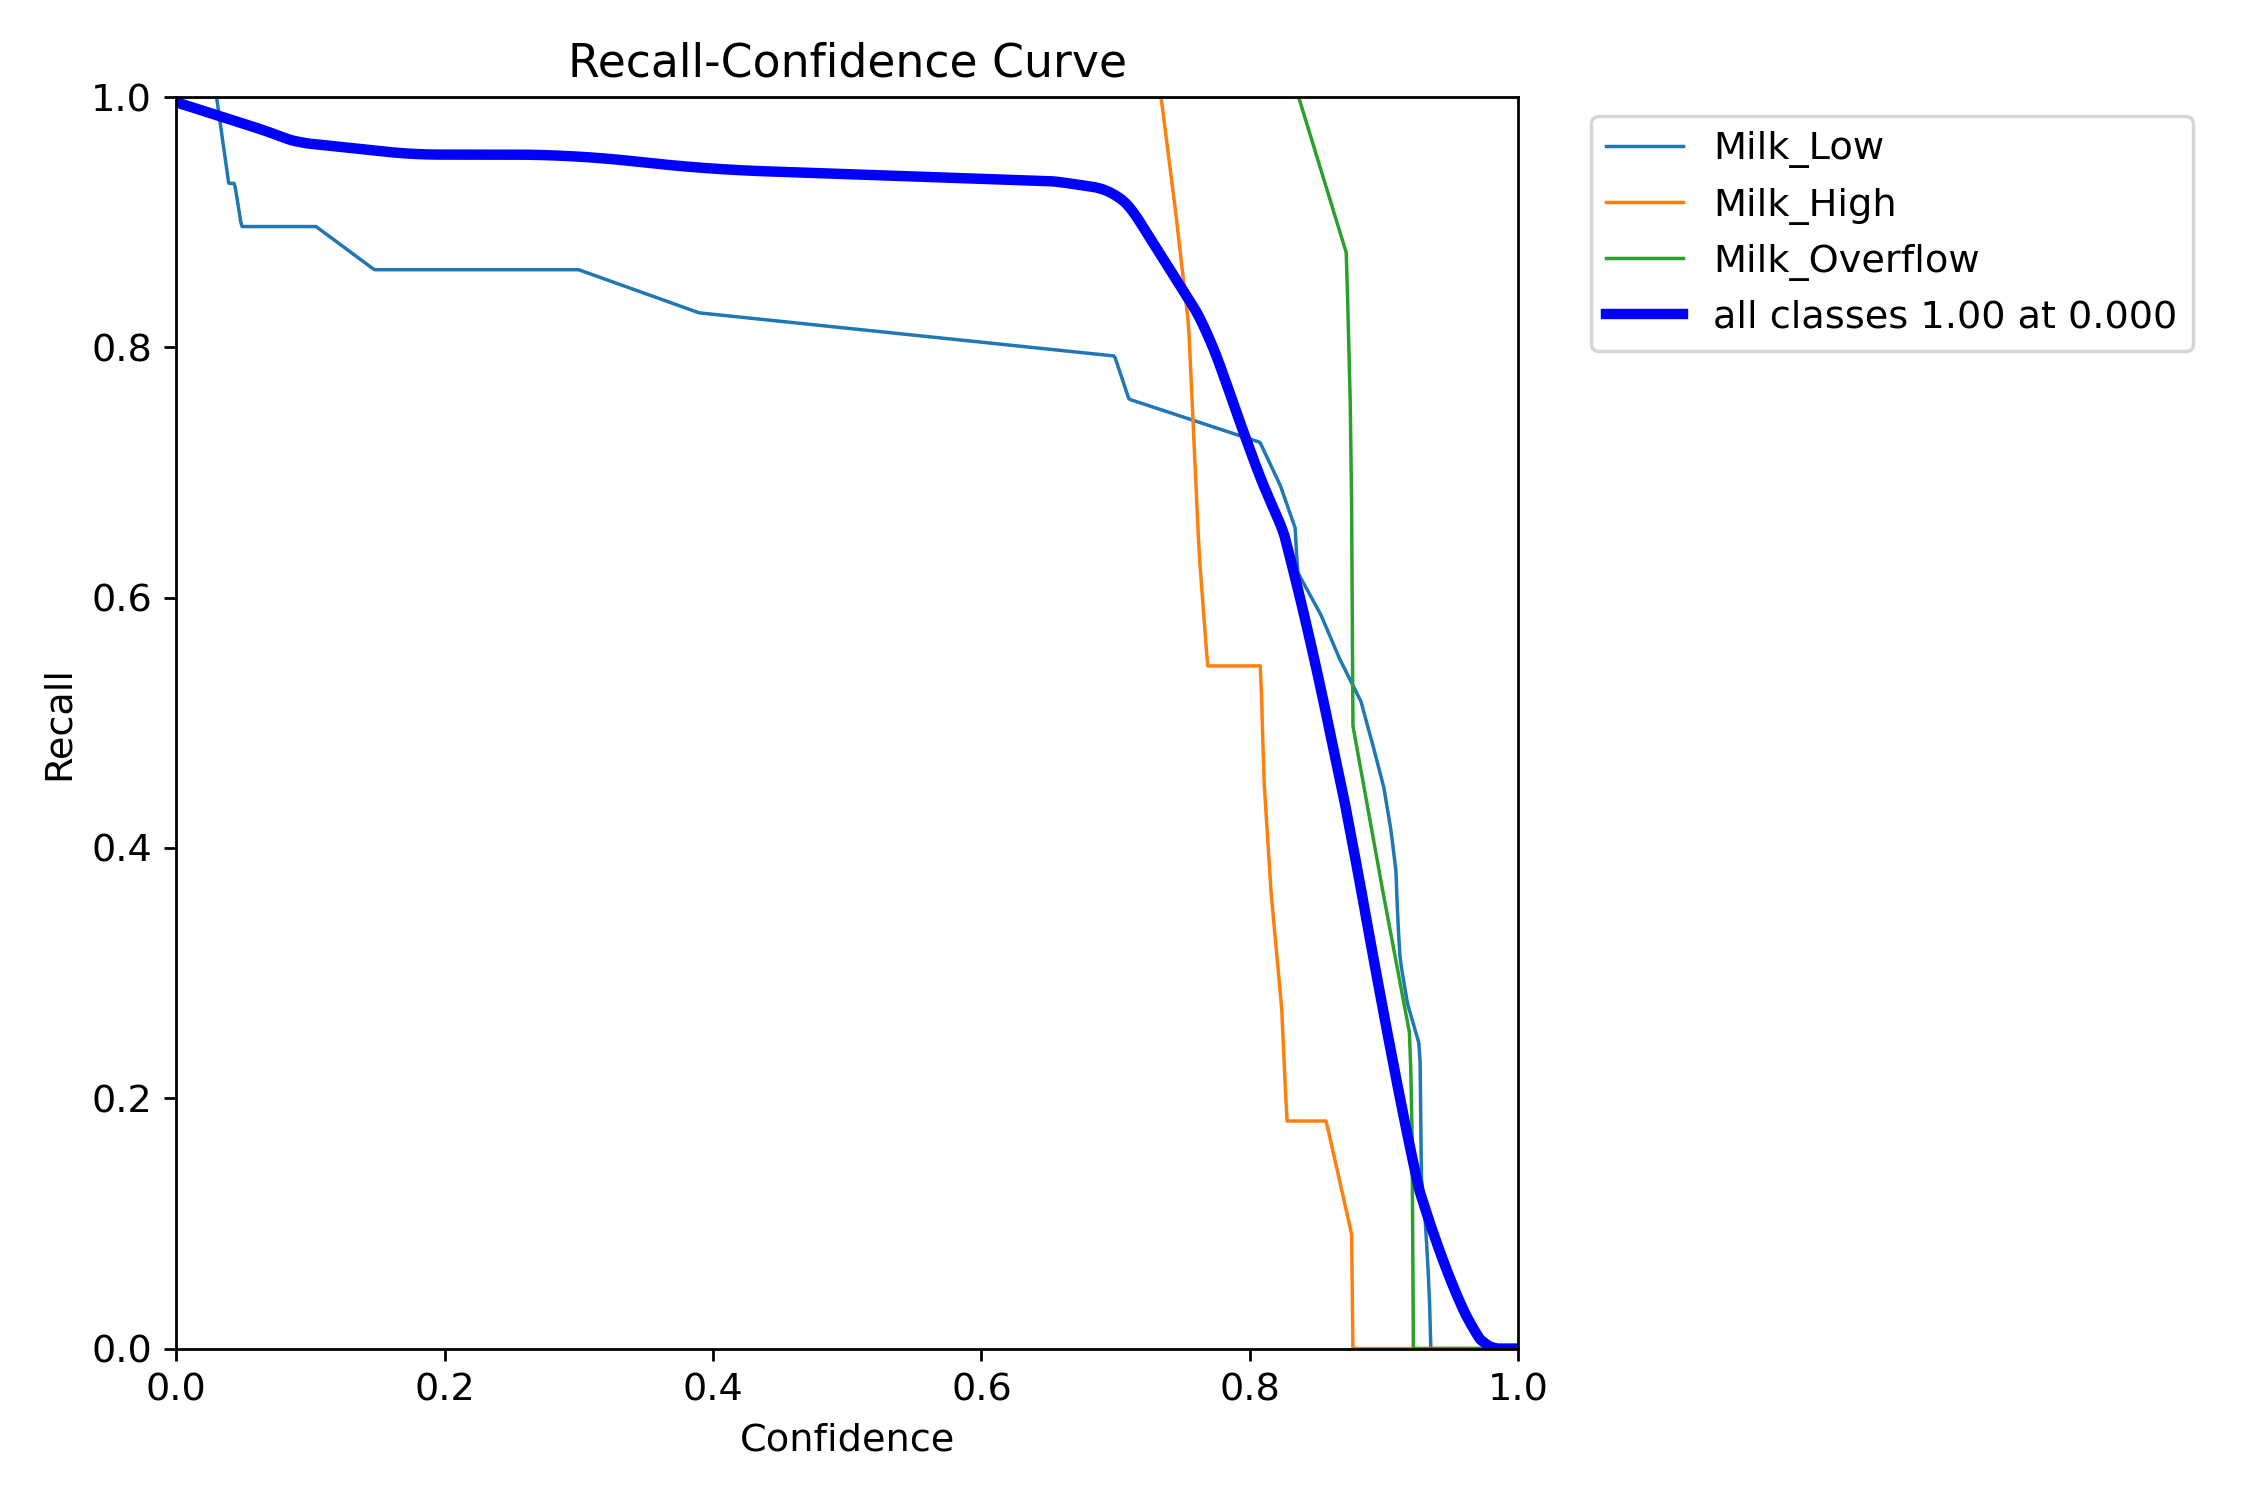

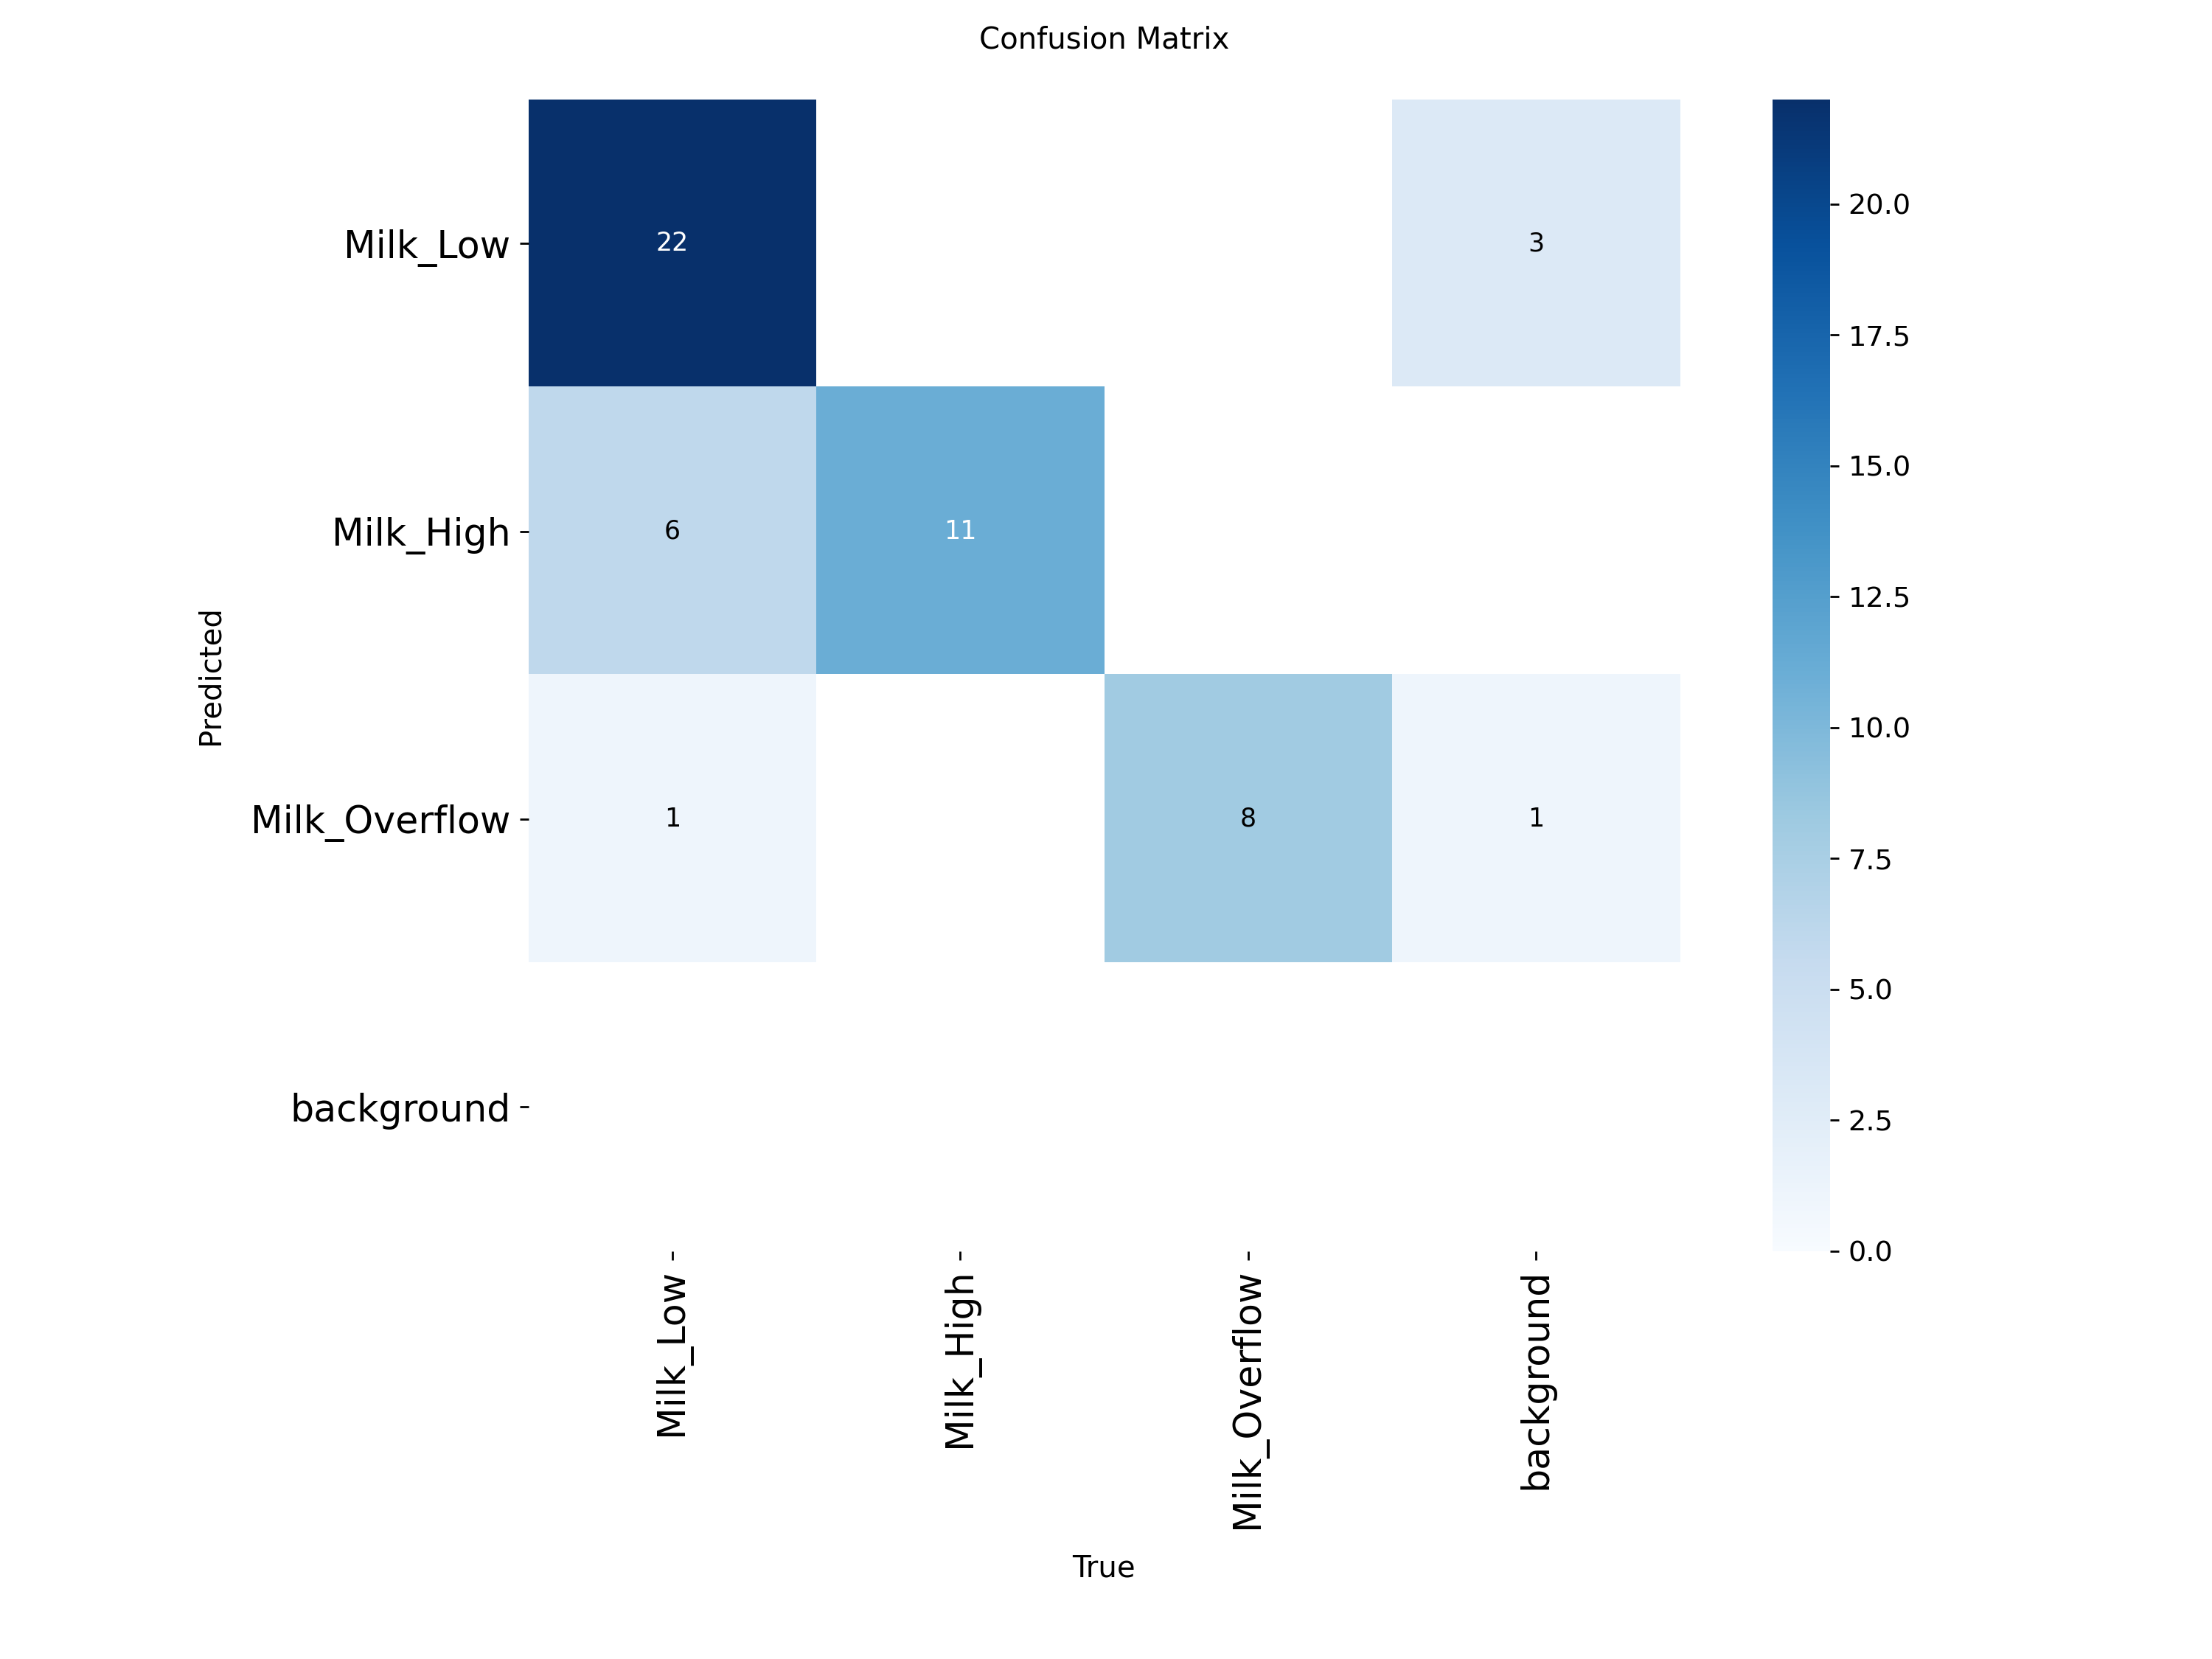

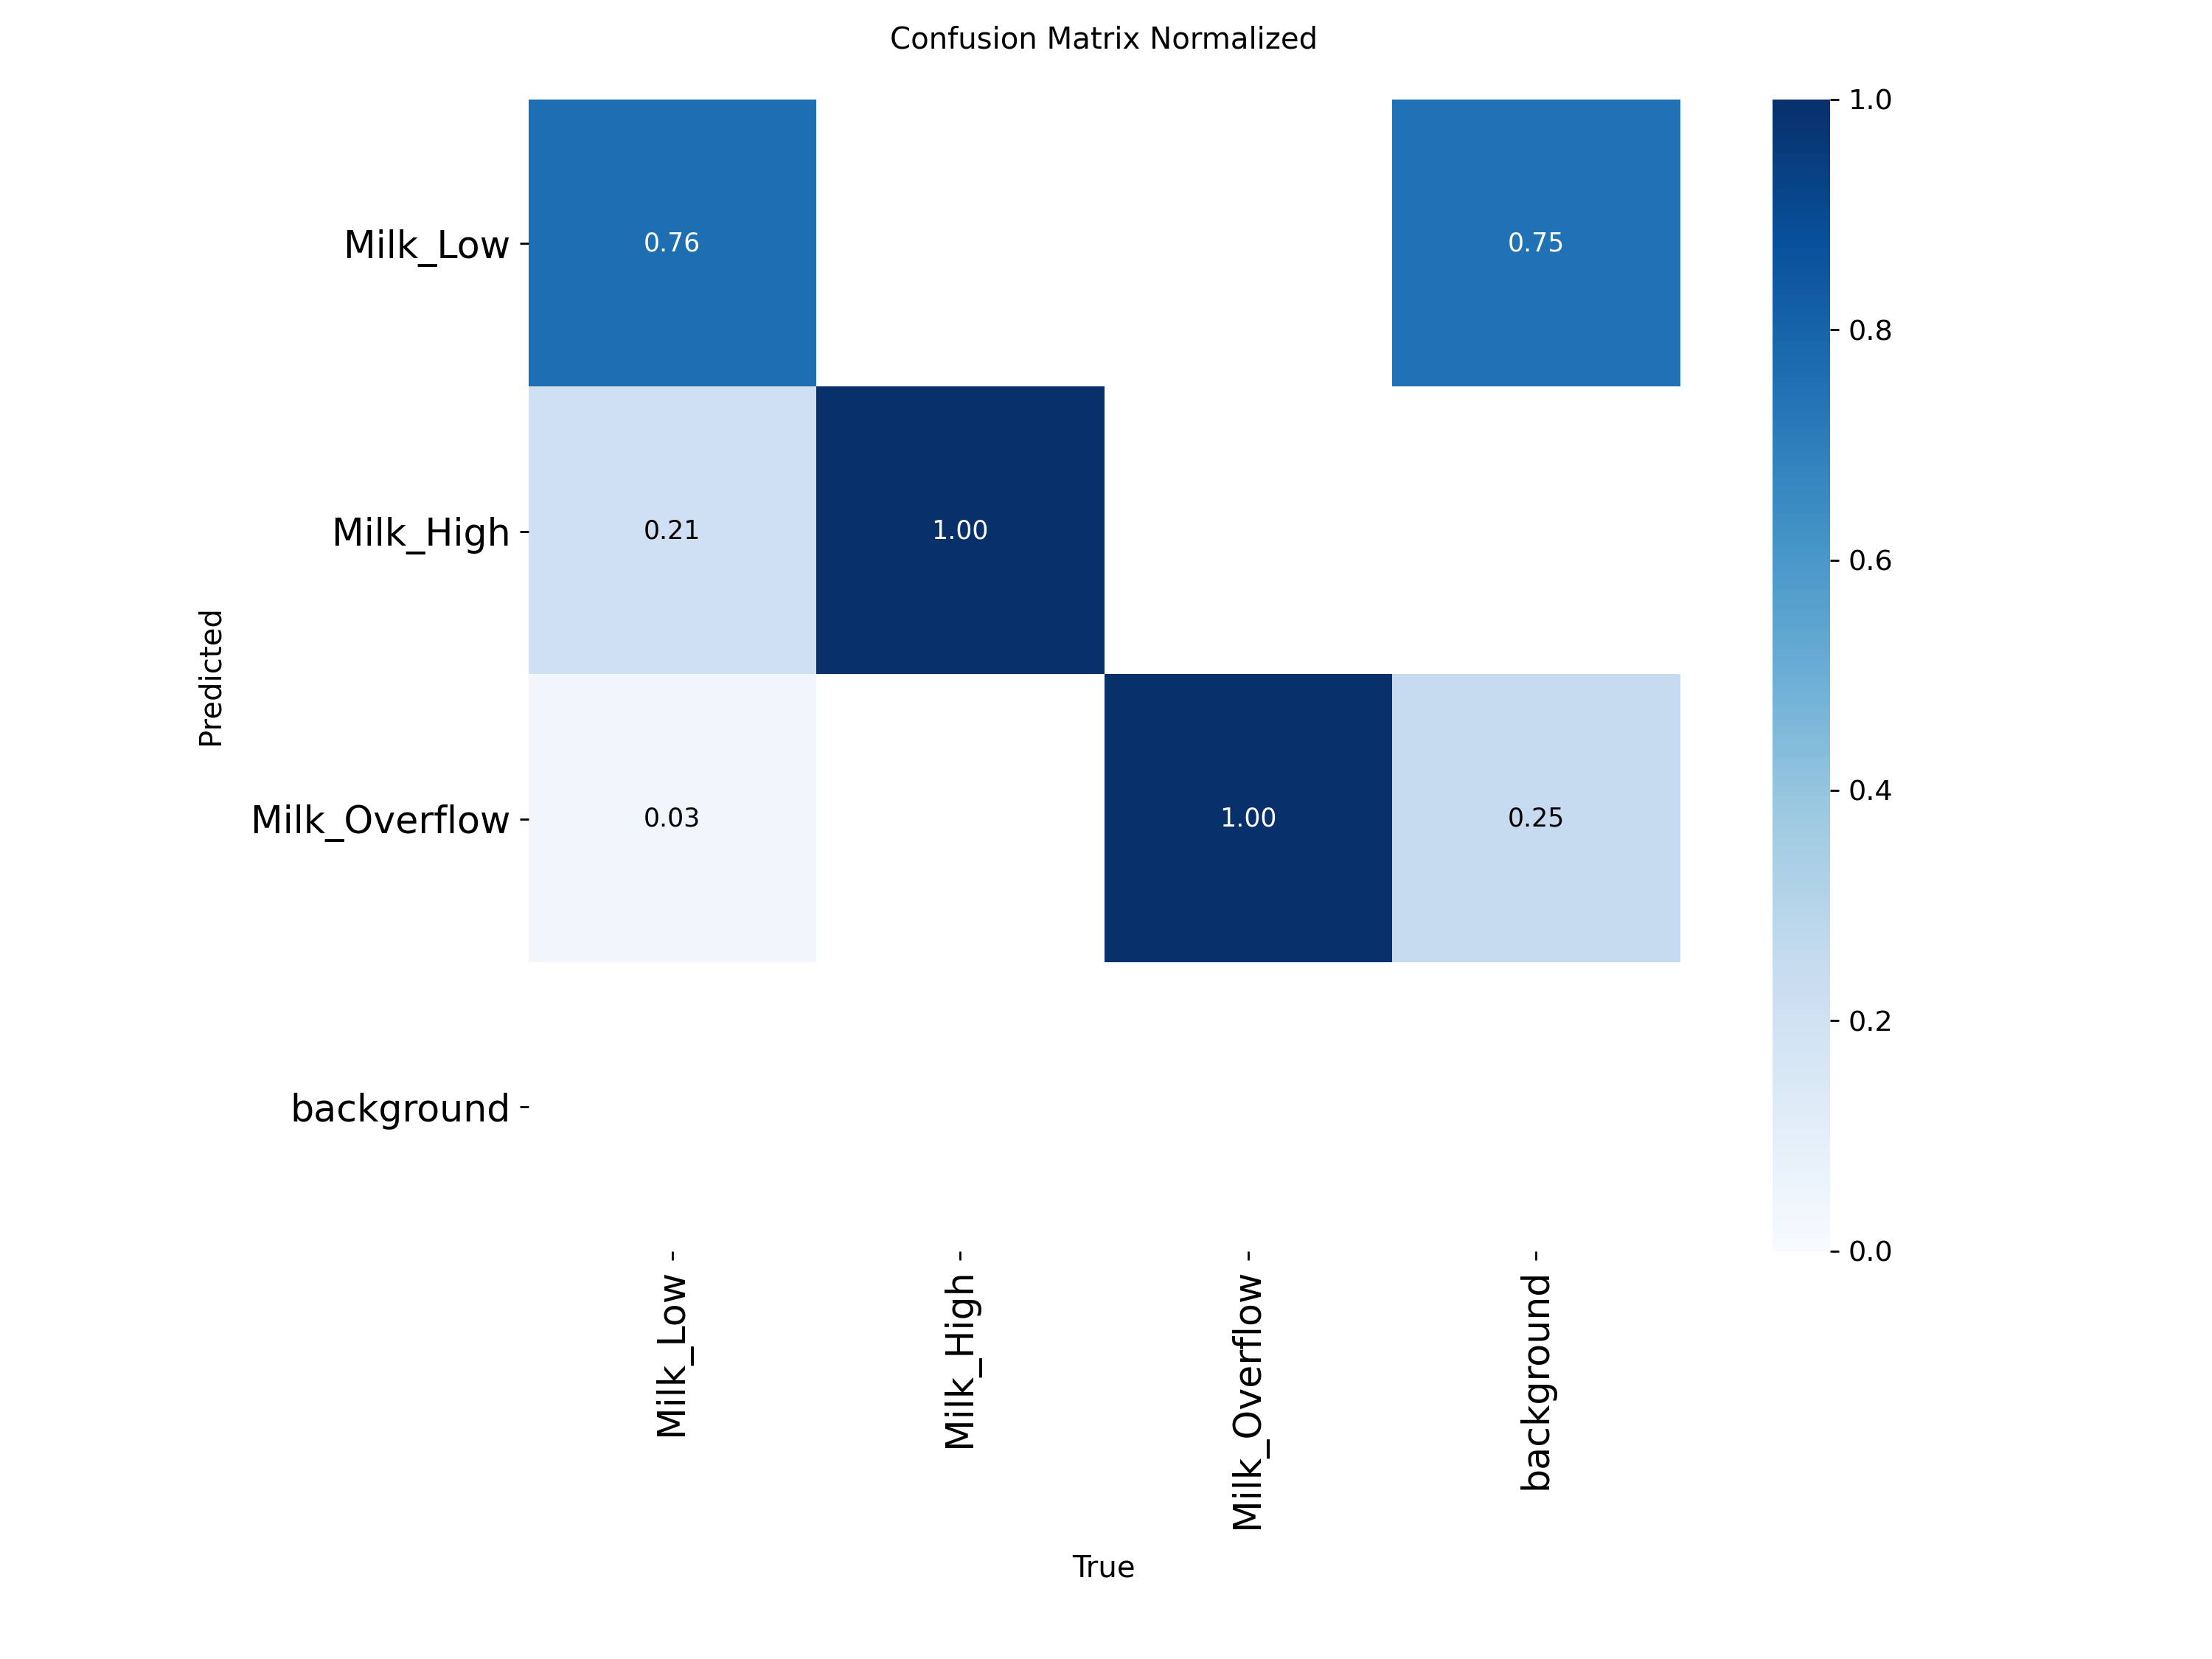

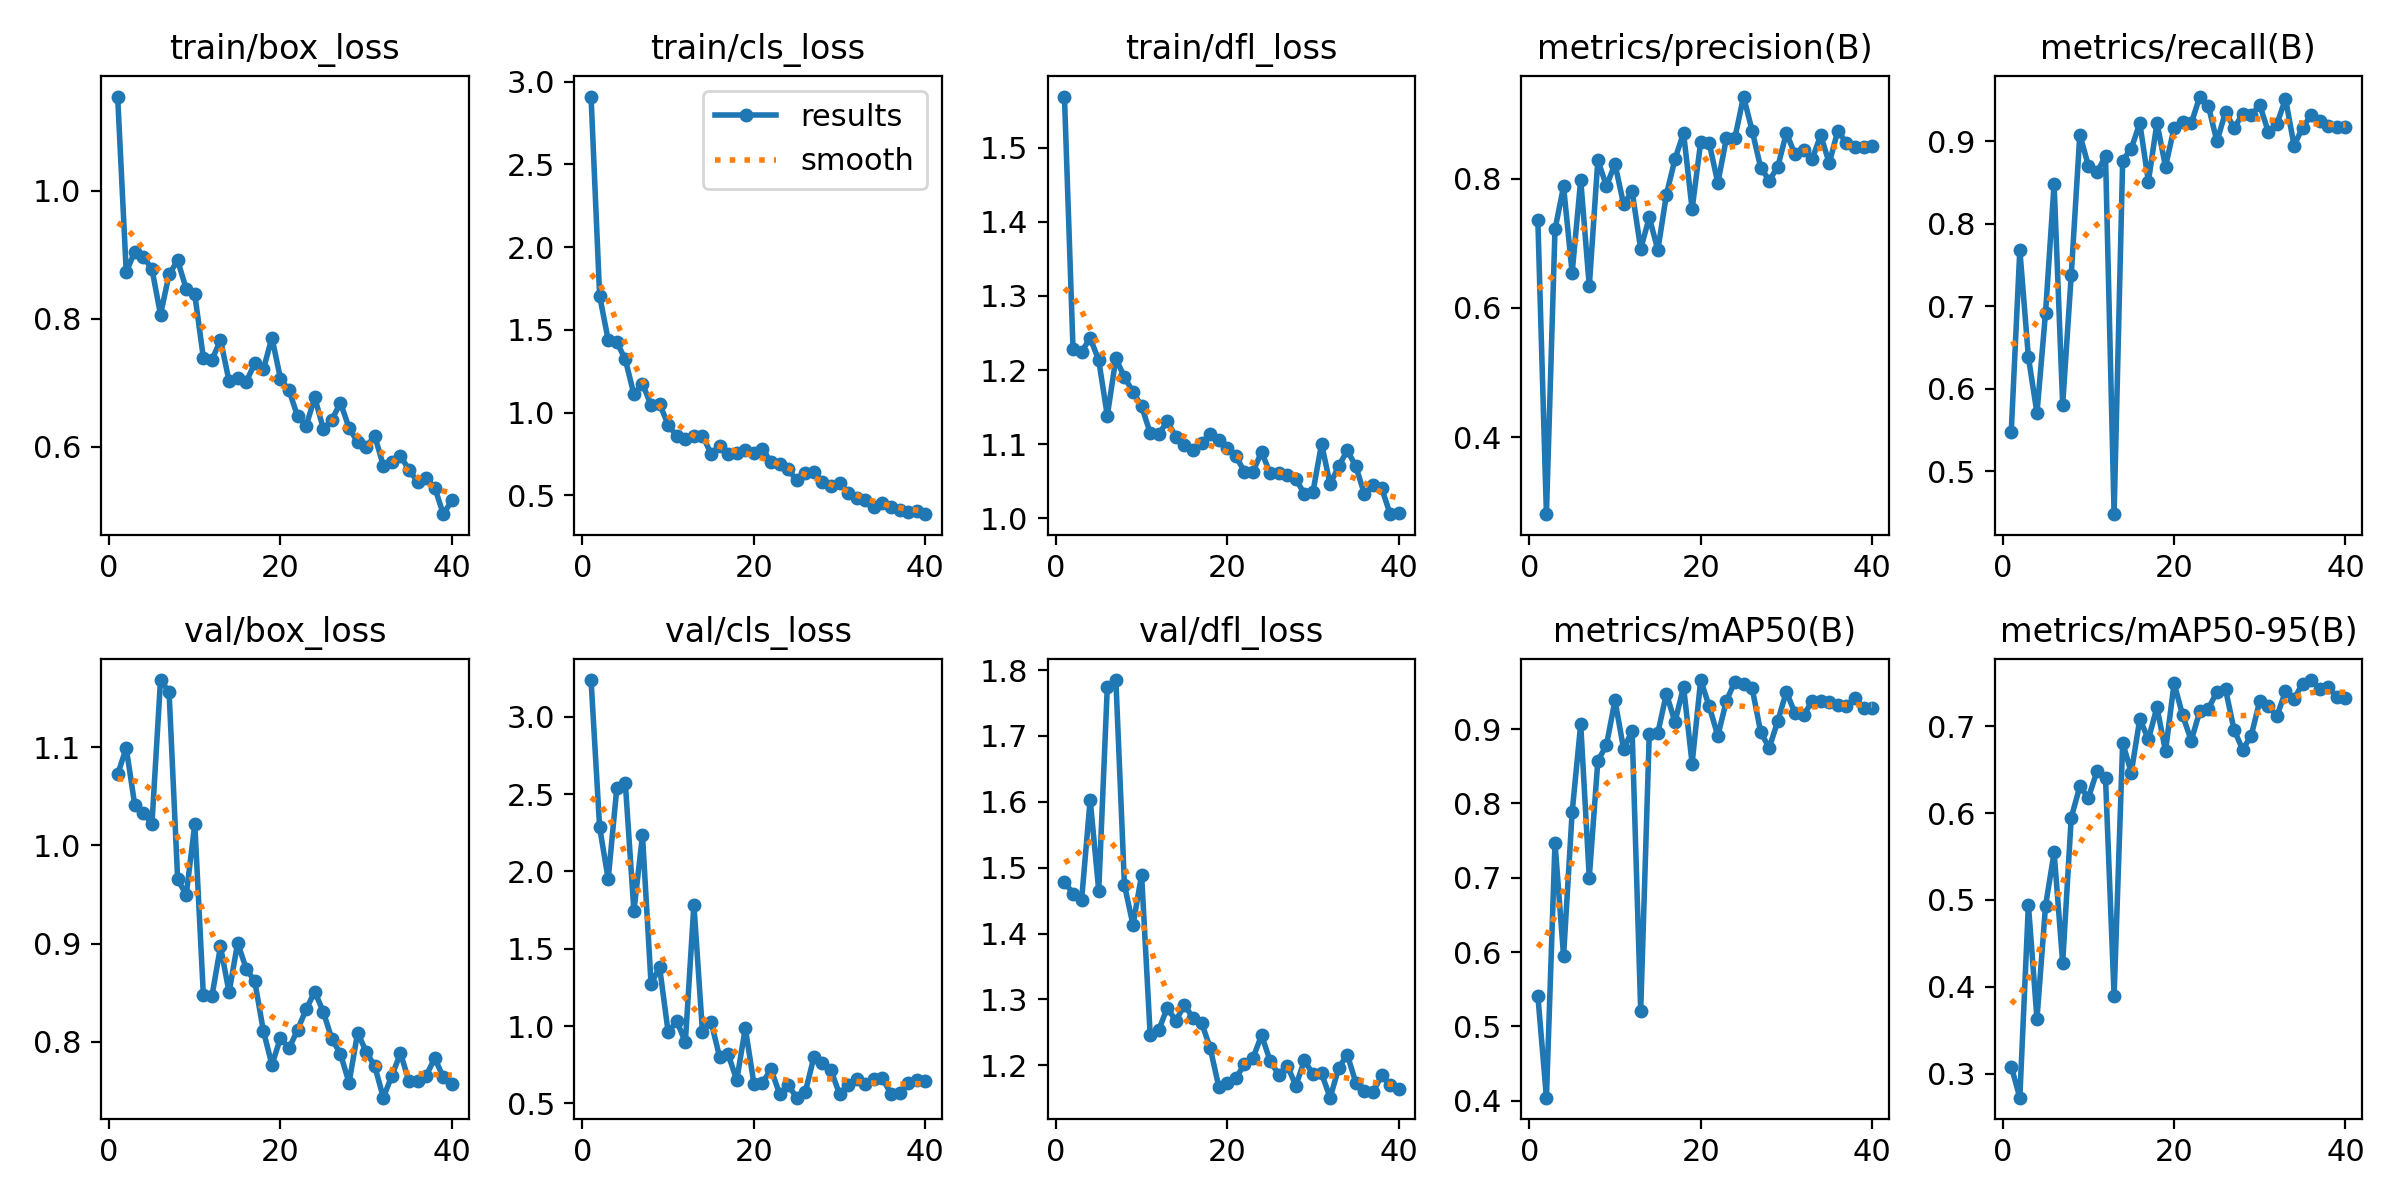

In [5]:
from IPython.display import Image, display
import glob

for img in glob.glob(f"{RUN_PATH}/*.png"):
    display(Image(filename=img))


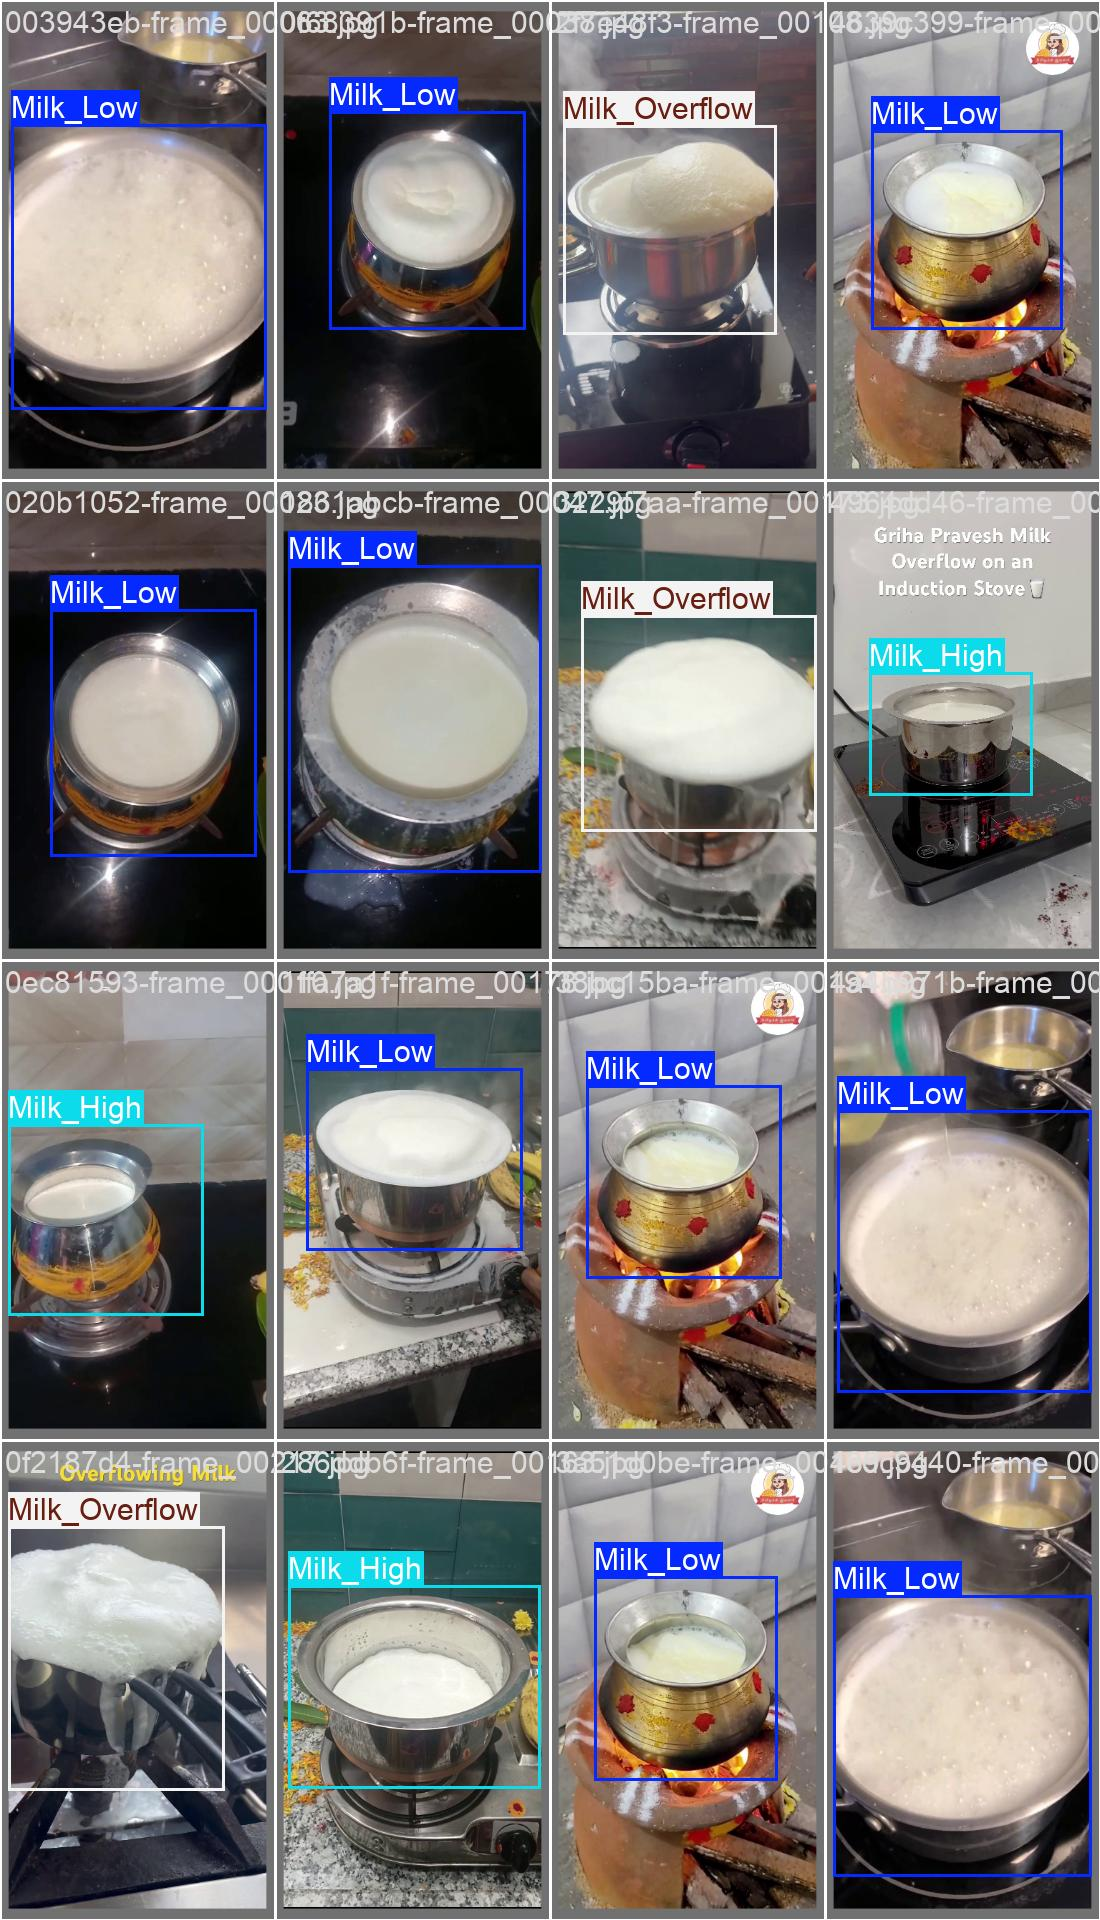

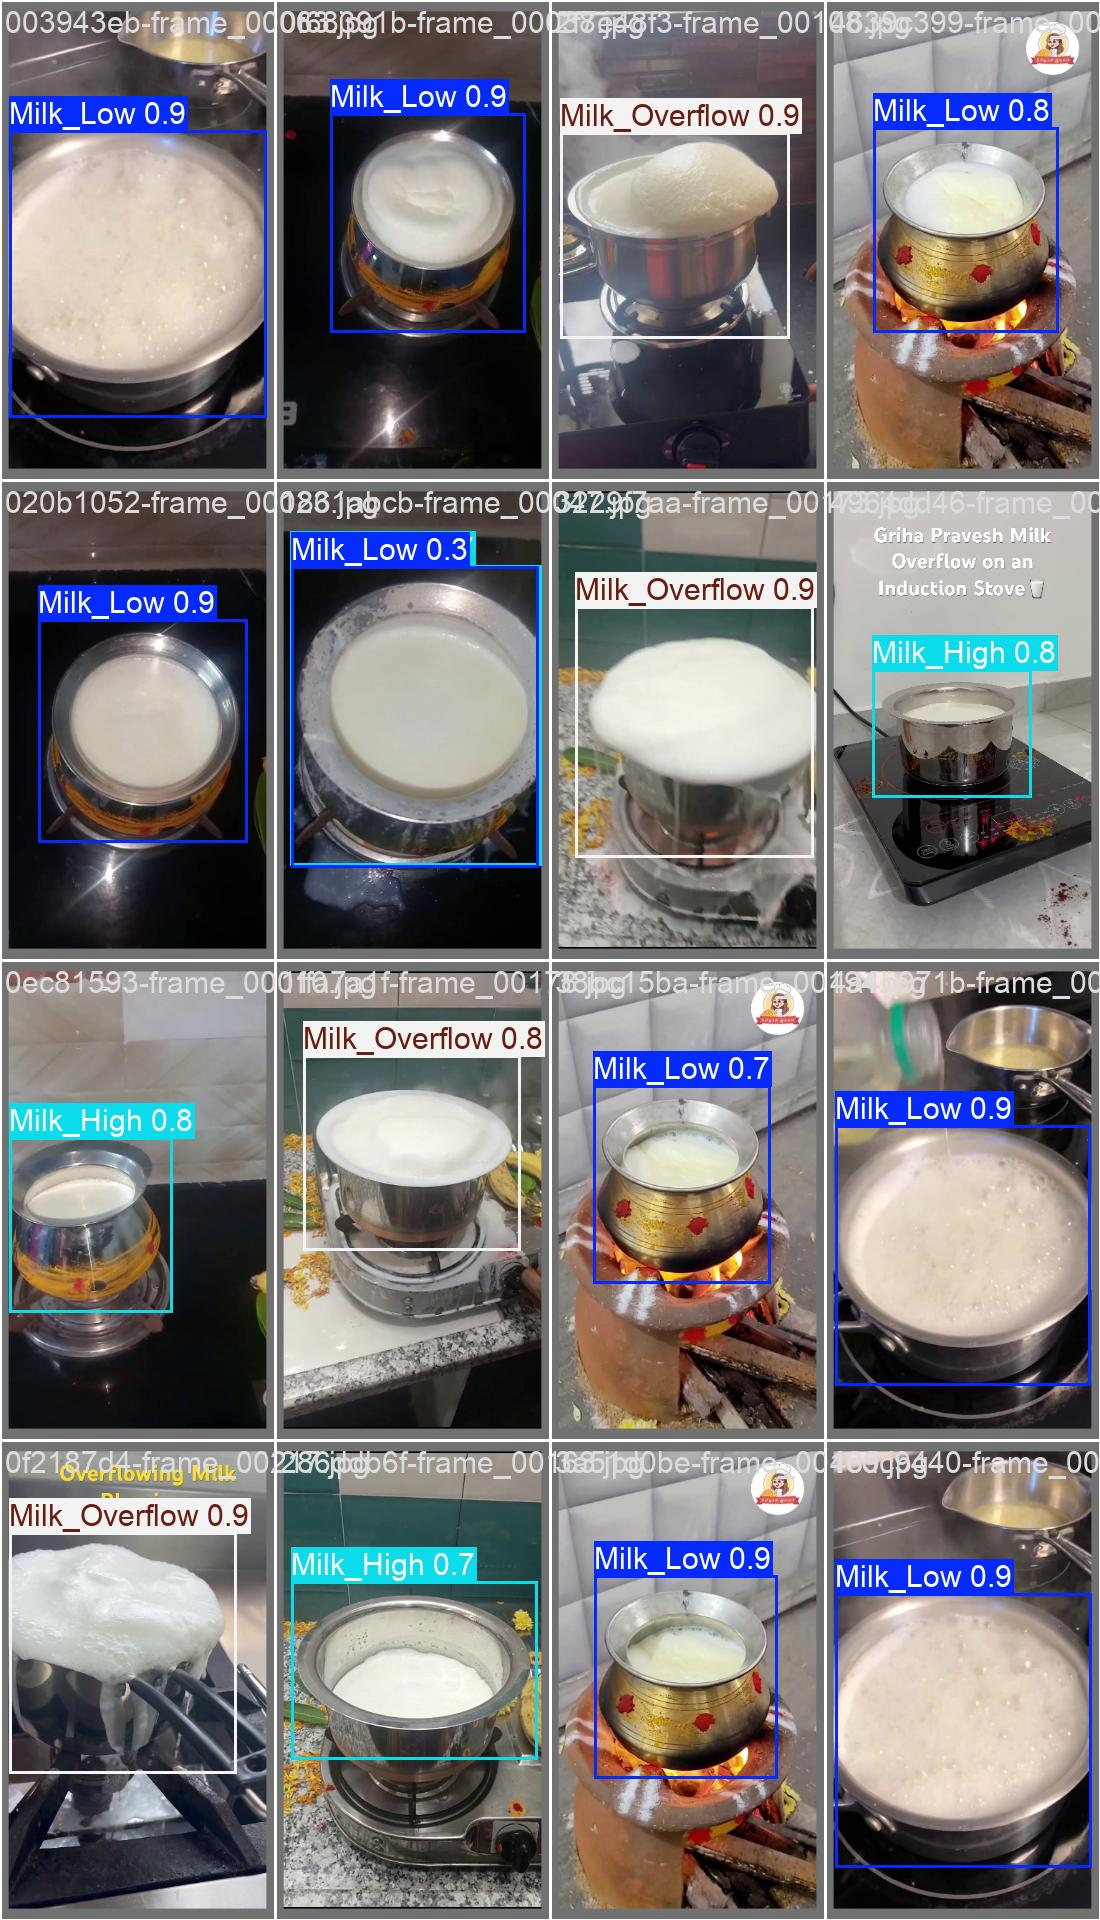

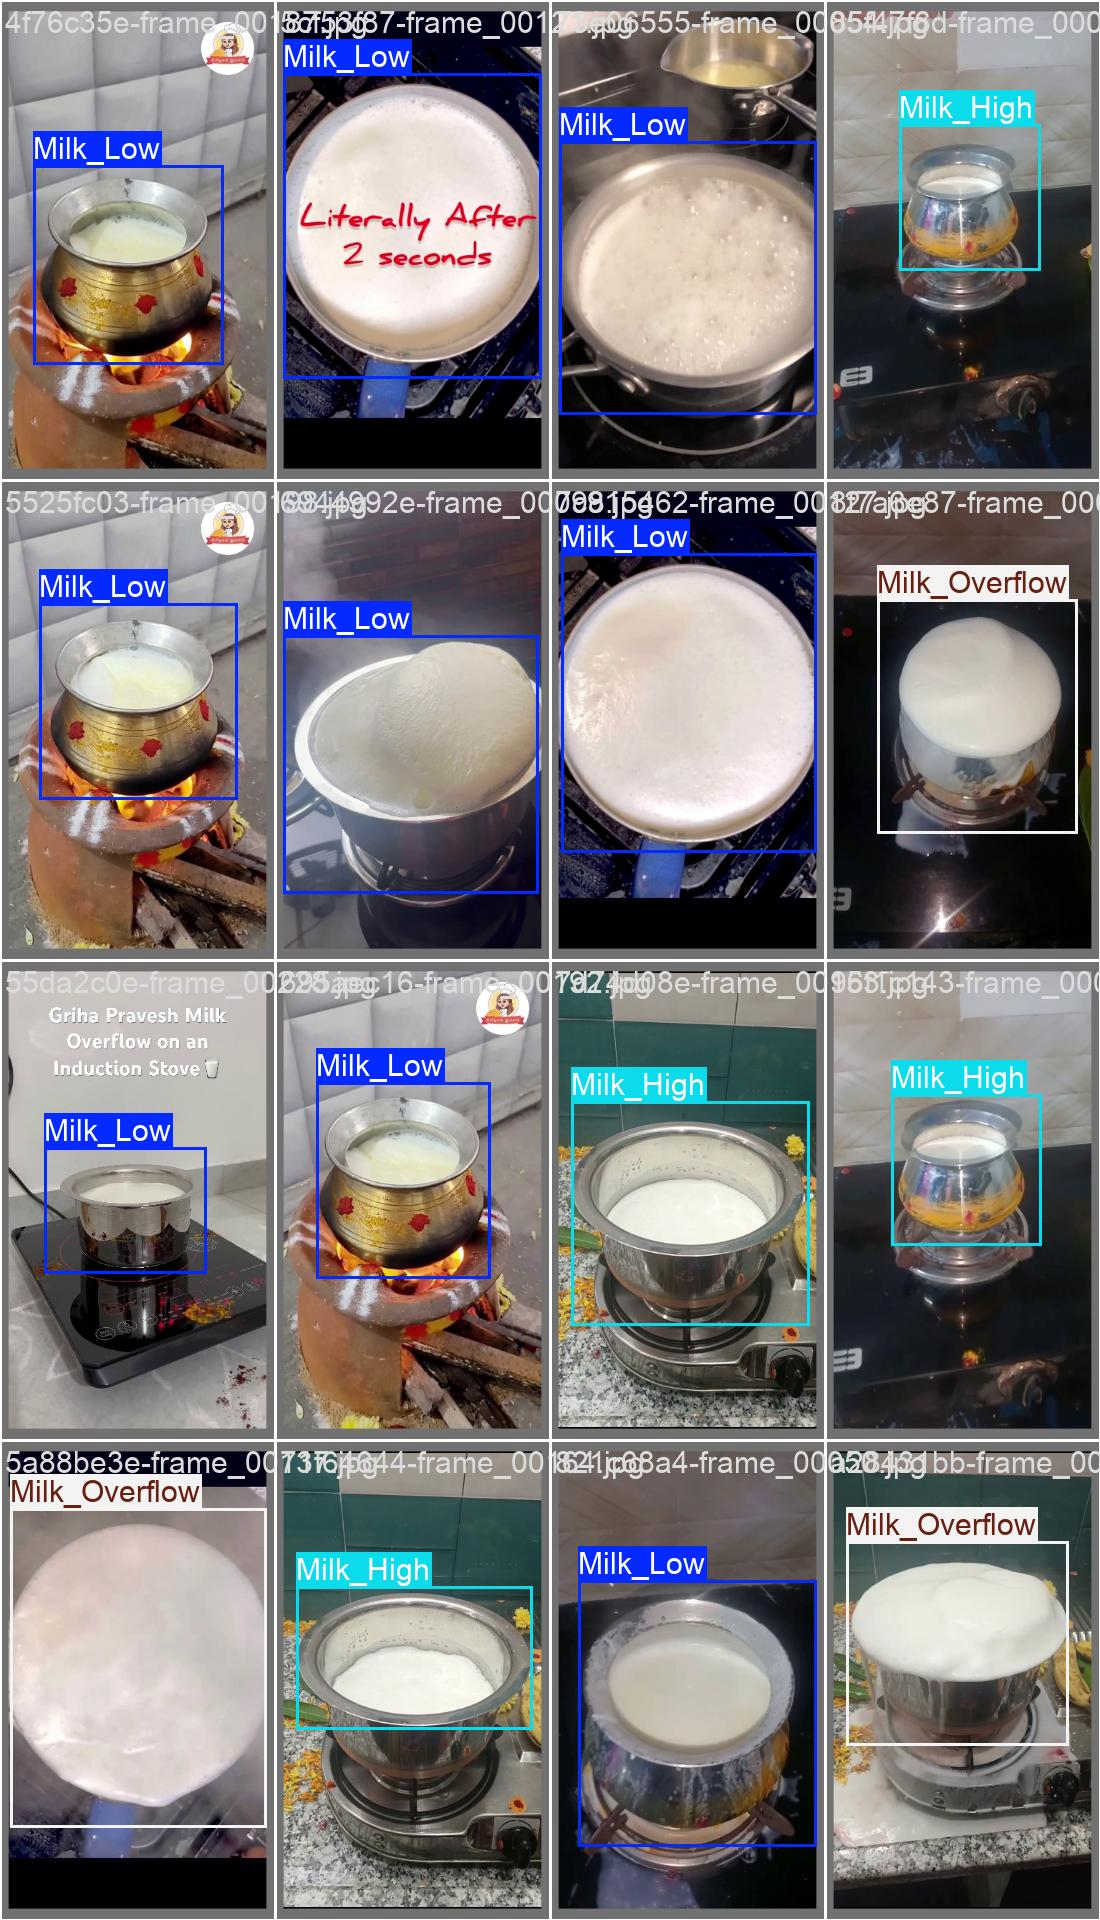

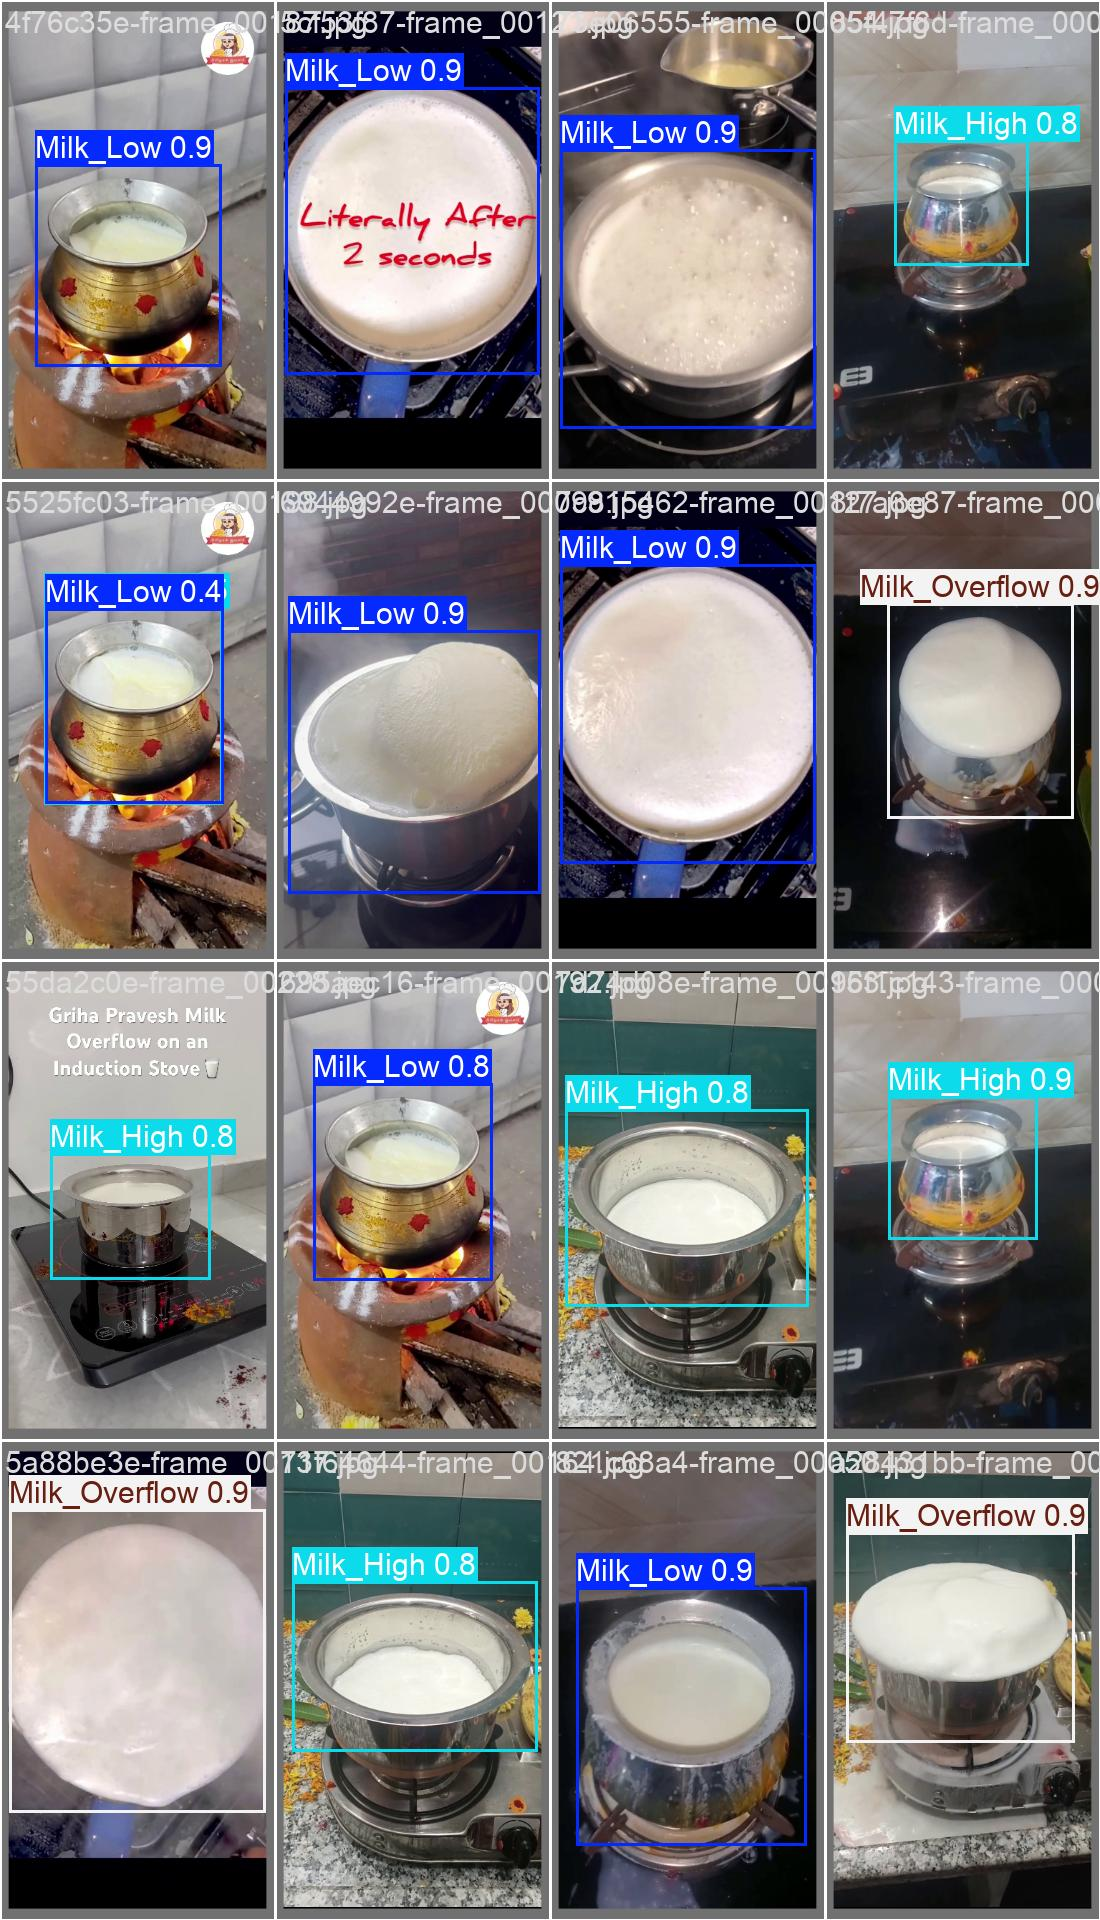

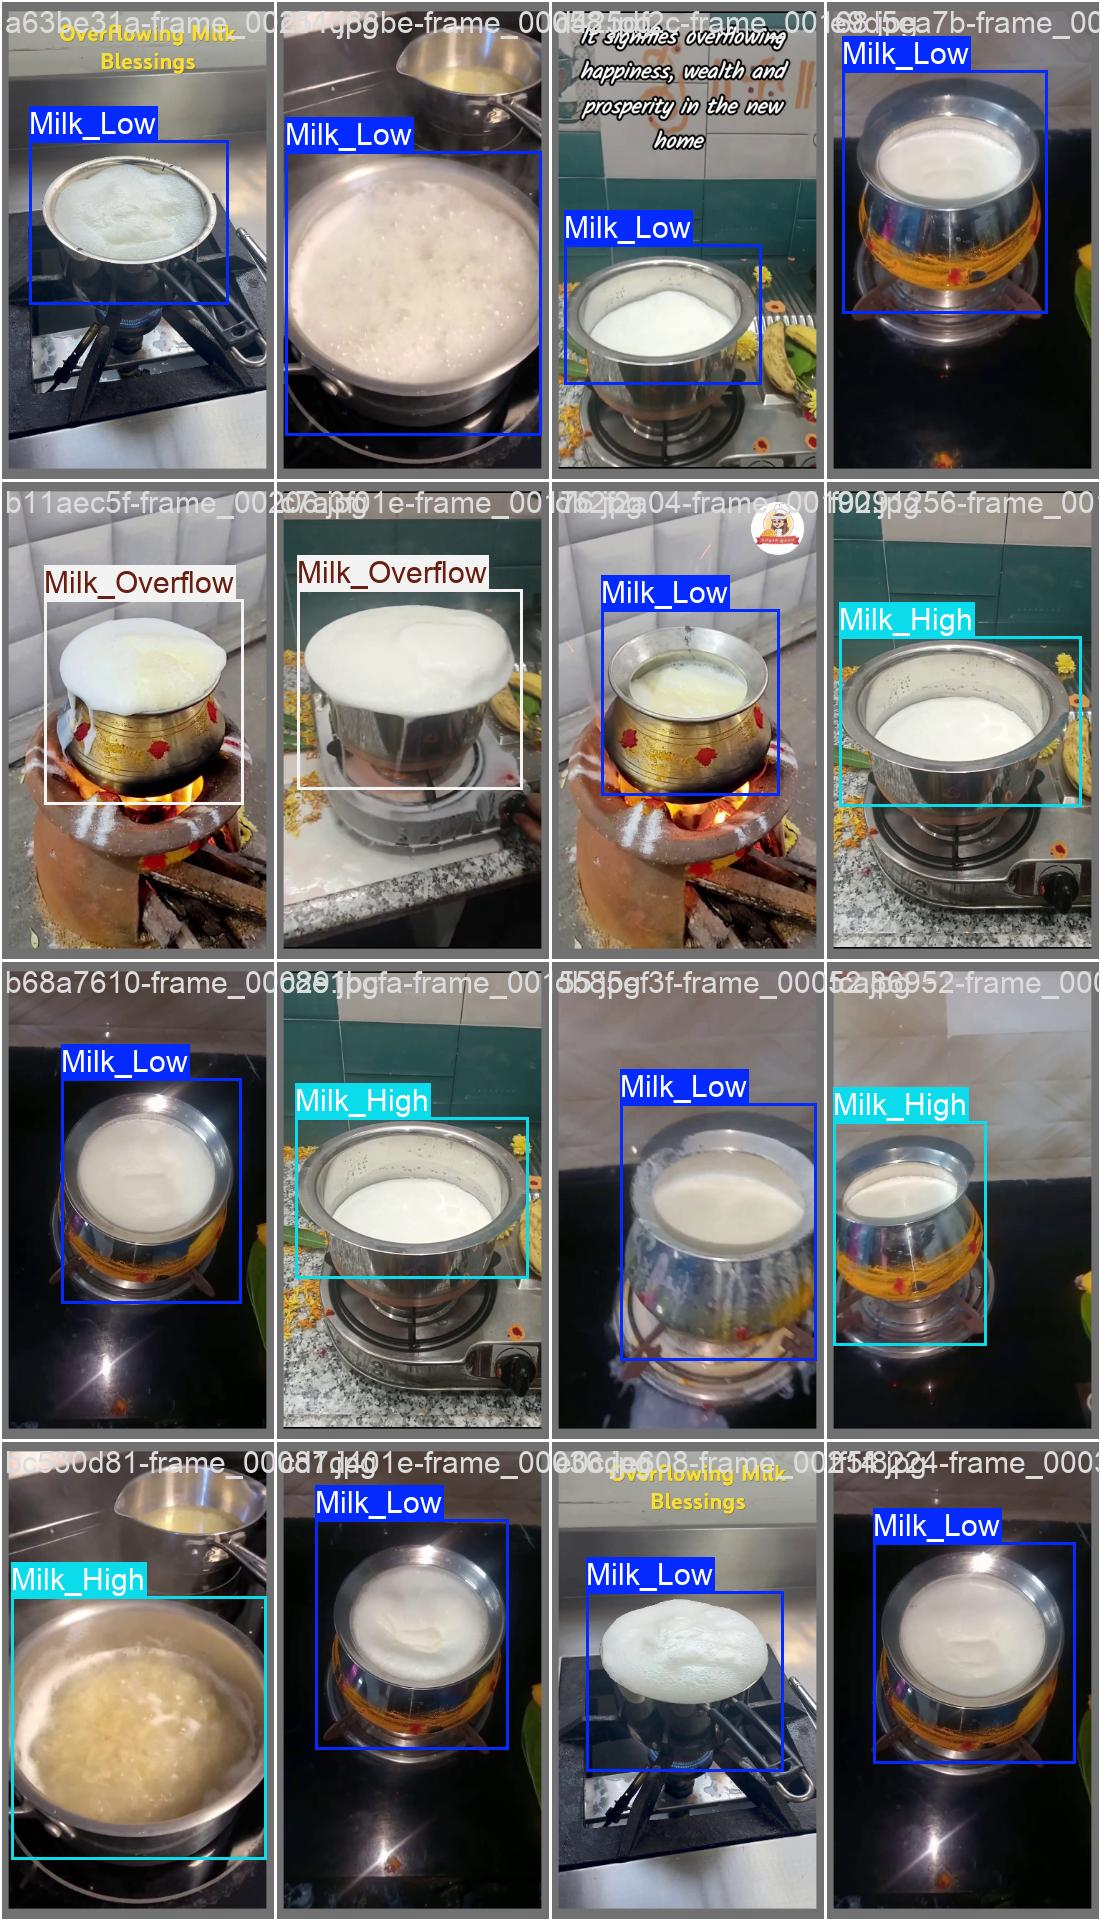

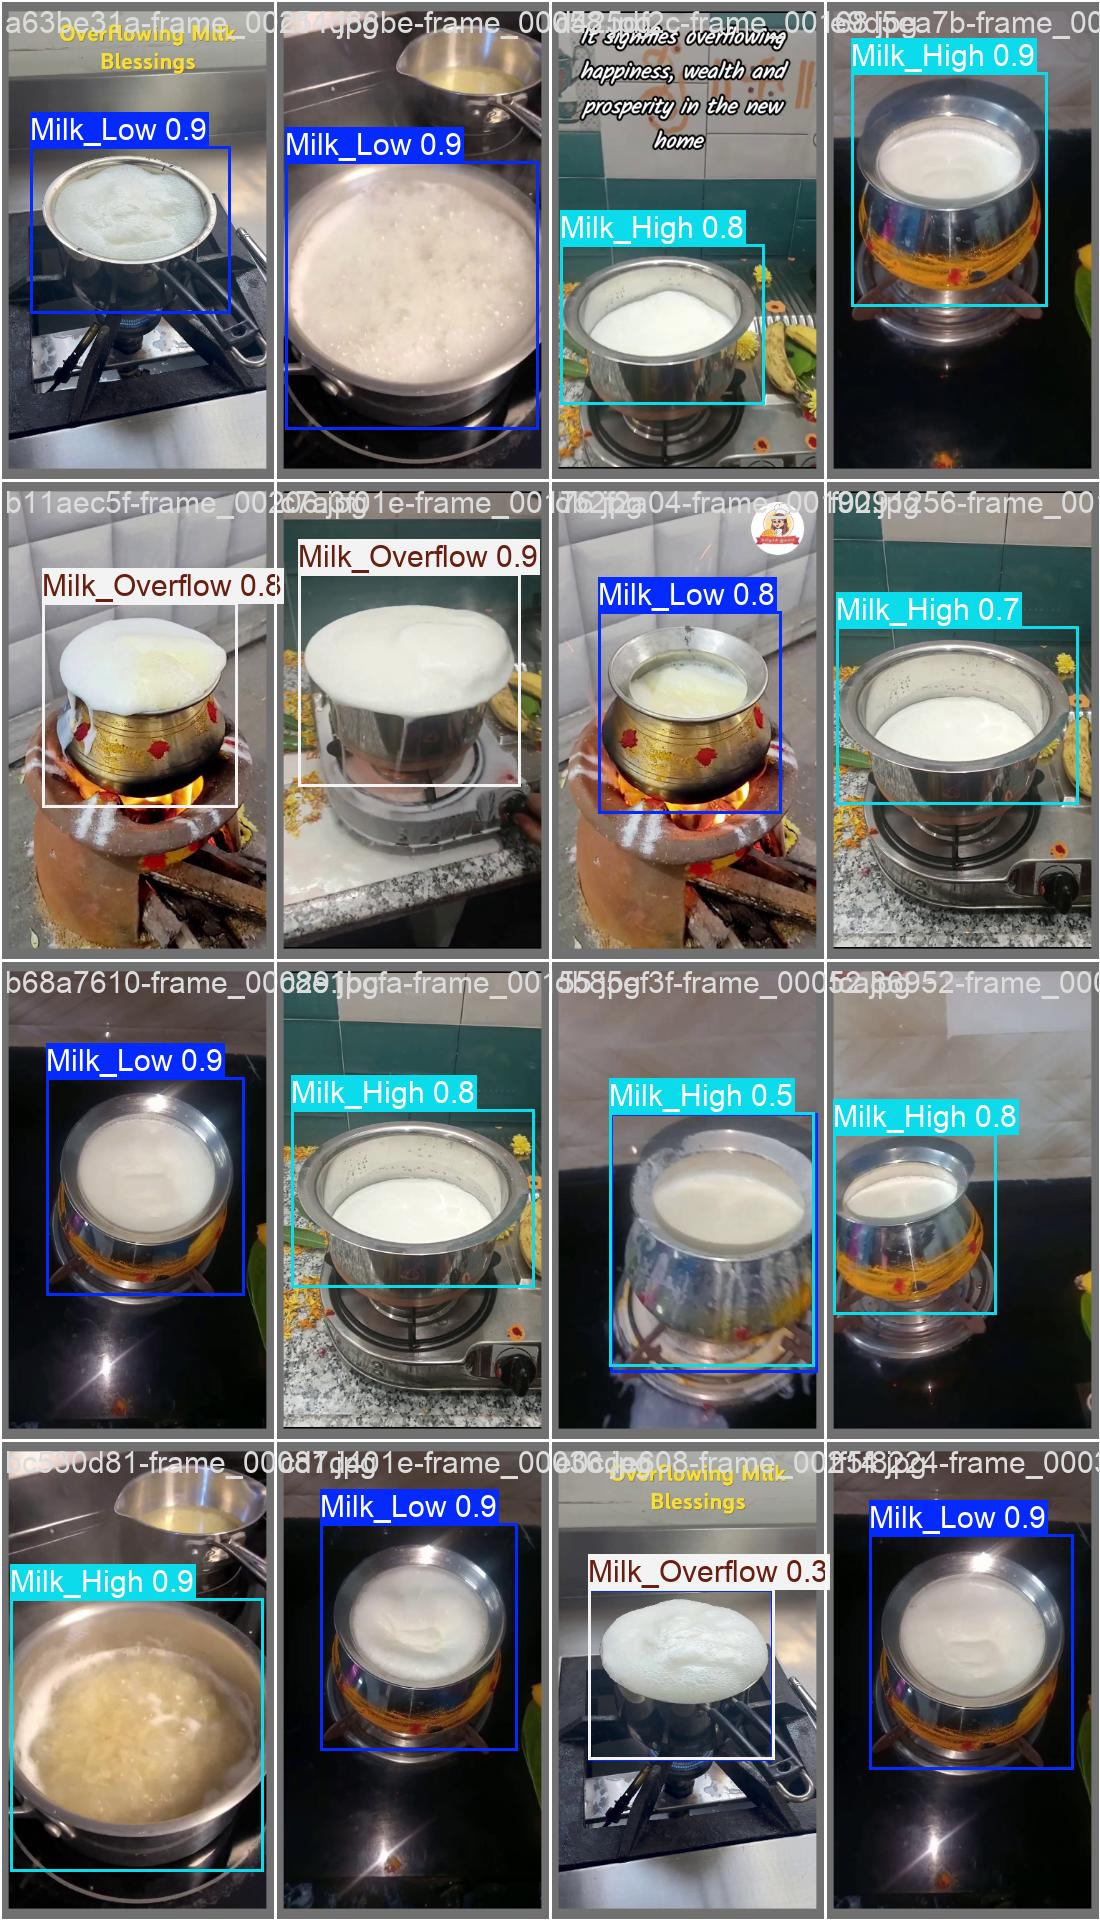

In [6]:
for img in glob.glob(f"{RUN_PATH}/val_batch*.jpg"):
    display(Image(filename=img))


In [7]:
from ultralytics import YOLO

model = YOLO(f"{RUN_PATH}/weights/best.pt")
metrics = model.val()
metrics


Ultralytics 8.3.234  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.20.0 ms, read: 279.431.2 MB/s, size: 306.6 KB)
val: Scanning D:\milk_project\data\labels\val.cache... 48 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 48/48 48.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 4.1s/it 12.4s2.7s1
                   all         48         48      0.874      0.932      0.932      0.753
              Milk_Low         29         29          1      0.795      0.981      0.852
             Milk_High         11         11      0.756          1      0.821      0.606
         Milk_Overflow          8          8      0.867          1      0.995      0.801
Speed: 5.1ms preprocess, 12.4ms inference, 0.0ms loss, 14.4ms postprocess per image
Results saved to D:\milk_proje

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000025A7F4E3820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [8]:
from ultralytics import YOLO

# Load your best model
model = YOLO("runs/detect/train/weights/best.pt")   # adjust path if different

# Predict on your image
results = model.predict(
    source=r"C:\Users\KARNATI KUMAR DATTA\Downloads\milk-overflowing-on-stove-260nw-1714027504.webp",
    save=True,    # saves prediction image
    show=False
)

results



image 1/1 C:\Users\KARNATI KUMAR DATTA\Downloads\milk-overflowing-on-stove-260nw-1714027504.webp: 480x640 1 Milk_Low, 101.7ms
Speed: 4.0ms preprocess, 101.7ms inference, 10.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to D:\milk_project\runs\detect\predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Milk_Low', 1: 'Milk_High', 2: 'Milk_Overflow'}
 obb: None
 orig_img: array([[[144, 153, 158],
         [140, 150, 155],
         [154, 161, 167],
         ...,
         [140, 156, 170],
         [123, 151, 163],
         [123, 155, 166]],
 
        [[ 80,  85,  91],
         [126, 133, 139],
         [160, 167, 172],
         ...,
         [ 62,  78,  92],
         [ 58,  82,  94],
         [124, 152, 164]],
 
        [[108, 106, 113],
         [159, 161, 168],
         [150, 157, 163],
         ...,
         [ 79,  93, 107],
         [109, 127, 140],
         [141, 162, 174]],
 
        ...,
 
        [[  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[  0,   0,   0],
         [255, 255, 255],
         [255, 255, 

In [9]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")   # adjust if your folder name is different

metrics = model.val()
metrics


Ultralytics 8.3.234  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.20.0 ms, read: 679.1198.9 MB/s, size: 314.6 KB)
val: Scanning D:\milk_project\data\labels\val.cache... 48 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 48/48 47.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 4.1s/it 12.4s2.4s1
                   all         48         48      0.874      0.932      0.932      0.753
              Milk_Low         29         29          1      0.795      0.981      0.852
             Milk_High         11         11      0.756          1      0.821      0.606
         Milk_Overflow          8          8      0.867          1      0.995      0.801
Speed: 4.1ms preprocess, 11.3ms inference, 0.0ms loss, 16.9ms postprocess per image
Results saved to D:\milk_proj

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000259809D4D60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          